In [132]:
import pandas as pd

# Load Cleaned dataset
df = pd.read_csv('../data/cleaned/f1_cleaned_results.csv')
df.head()

,year,grand_prix,forename,surname,name_constructor,position,points
0,2008,Australian Grand Prix,Lewis,Hamilton,McLaren,1,10.0
1,2008,Australian Grand Prix,Nick,Heidfeld,BMW Sauber,2,8.0
2,2008,Australian Grand Prix,Nico,Rosberg,Williams,3,6.0
3,2008,Australian Grand Prix,Fernando,Alonso,Renault,4,5.0
4,2008,Australian Grand Prix,Heikki,Kovalainen,McLaren,5,4.0


In [133]:
# Top Drivers by Total Points (All Time)

# Group by driver and sum total points
top_drivers = df.groupby(['forename', 'surname'])['points'].sum().reset_index()

# Sort in descending order
top_drivers = top_drivers.sort_values(by='points', ascending=False)

top_drivers.head(10)

,forename,surname,points
523,Lewis,Hamilton,4820.5
765,Sebastian,Vettel,3098.0
571,Max,Verstappen,2912.5
256,Fernando,Alonso,2329.0
502,Kimi,Räikkönen,1873.0
831,Valtteri,Bottas,1788.0
614,Nico,Rosberg,1594.5
768,Sergio,Pérez,1585.0
578,Michael,Schumacher,1566.0
132,Charles,Leclerc,1363.0


In [134]:
# List of potential numeric columns
possible_numeric_cols = ['position', 'points', 'grid', 'laps', 'milliseconds']

# Only convert the ones that are present
for col in possible_numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Confirm conversion
df.dtypes


year                  int64
grand_prix           object
forename             object
surname              object
name_constructor     object
position            float64
points              float64
dtype: object

In [135]:
# Top Drivers by Race Wins (All Time)

# Filter only 1st place finishes
wins_df = df[df['position'] == 1]

# Group by driver and count number of wins
top_winners = wins_df.groupby(['forename', 'surname']).size().reset_index(name='wins')

# Sort by most wins
top_winners = top_winners.sort_values(by='wins', ascending=False)

top_winners.head(10)

,forename,surname,wins
66,Lewis,Hamilton,105
75,Michael,Schumacher,91
74,Max,Verstappen,63
106,Sebastian,Vettel,53
0,Alain,Prost,51
4,Ayrton,Senna,41
24,Fernando,Alonso,32
81,Nigel,Mansell,31
37,Jackie,Stewart,27
47,Jim,Clark,25


In [136]:
# Driver Points per Year

# Group by year and driver, and sum their points
driver_points_yearly = df.groupby(['year', 'forename', 'surname'])['points'].sum().reset_index()

# Sort for cleanliness
driver_points_yearly = driver_points_yearly.sort_values(['year', 'points'], ascending=[True, False])

driver_points_yearly.head(10)

,year,forename,surname,points
57,1950,Nino,Farina,30.0
50,1950,Luigi,Fagioli,28.0
45,1950,Juan,Fangio,27.0
49,1950,Louis,Rosier,13.0
0,1950,Alberto,Ascari,11.0
40,1950,Johnnie,Parsons,9.0
4,1950,Bill,Holland,6.0
66,1950,Prince,Bira,5.0
48,1950,Louis,Chiron,4.0
53,1950,Mauri,Rose,4.0


In [137]:
# Export the table
driver_points_yearly.to_csv('../data/cleaned/driver_points_per_year.csv', index=False)

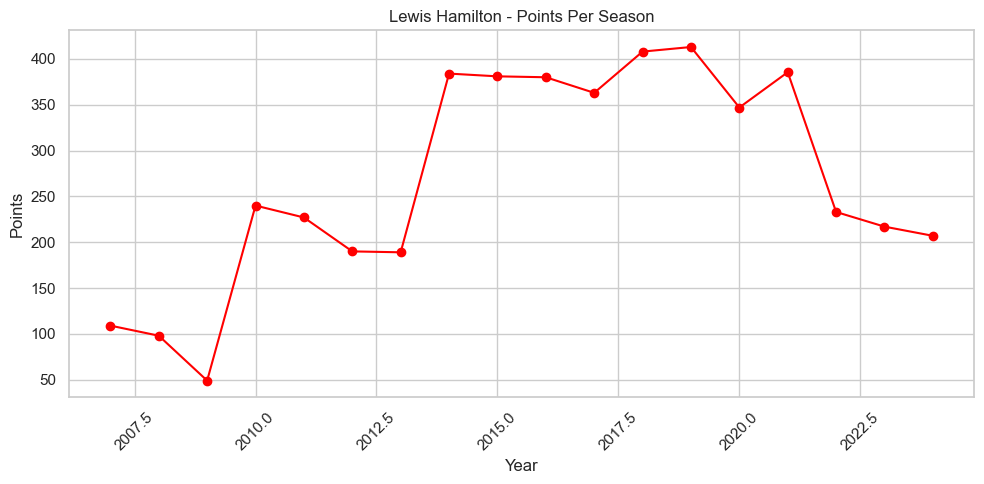

In [138]:
import matplotlib.pyplot as plt

# Filter for Hamilton
hamilton_df = driver_points_yearly[(driver_points_yearly['forename'] == 'Lewis') & (driver_points_yearly['surname'] == 'Hamilton')]

# Plot
plt.figure(figsize=(10,5))
plt.plot(hamilton_df['year'], hamilton_df['points'], marker='o', linestyle='-', color='red')

plt.title('Lewis Hamilton - Points Per Season')
plt.xlabel('Year')
plt.ylabel('Points')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [139]:
hamilton_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 2801 to 3200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      18 non-null     int64  
 1   forename  18 non-null     object 
 2   surname   18 non-null     object 
 3   points    18 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 720.0+ bytes


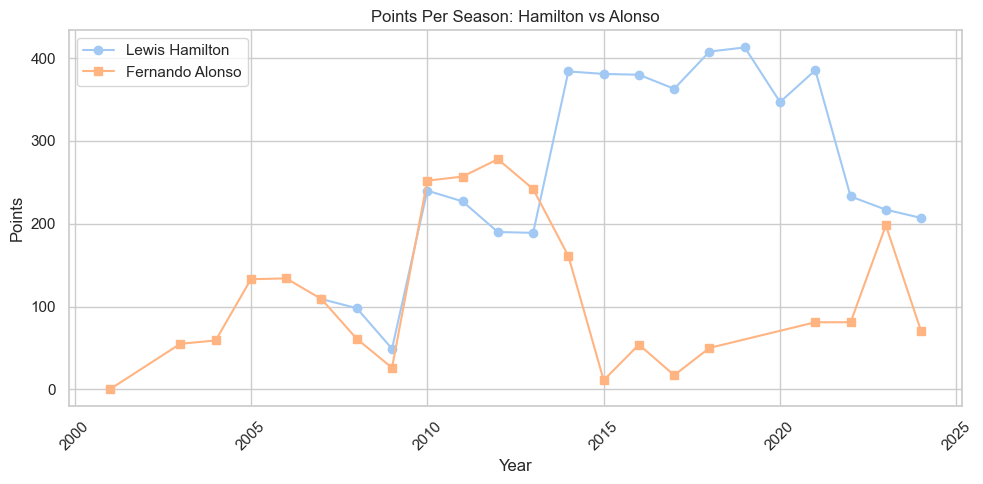

In [140]:
# Filter for another driver
alonso_df = driver_points_yearly[
    (driver_points_yearly['forename'] == 'Fernando') & (driver_points_yearly['surname'] == 'Alonso')
]

# Plot both
plt.figure(figsize=(10, 5))
plt.plot(hamilton_df['year'], hamilton_df['points'], marker='o', label='Lewis Hamilton')
plt.plot(alonso_df['year'], alonso_df['points'], marker='s', label='Fernando Alonso')

plt.title('Points Per Season: Hamilton vs Alonso')
plt.xlabel('Year')
plt.ylabel('Points')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [141]:
# Constructor Points per Year

# Group by year and constructor name, and sum points
constructor_points_yearly = df.groupby(['year', 'name_constructor'])['points'].sum().reset_index()

# Sort for clarity
constructor_points_yearly = constructor_points_yearly.sort_values(['year', 'points'], ascending=[True, False])

# Show a preview
constructor_points_yearly.head(10)

,year,name_constructor,points
1,1950,Alfa Romeo,89.0
7,1950,Ferrari,21.0
21,1950,Talbot-Lago,20.0
8,1950,Kurtis Kraft,14.0
12,1950,Maserati,11.0
4,1950,Deidt,10.0
18,1950,Simca,3.0
0,1950,Adams,0.0
2,1950,Alta,0.0
3,1950,Cooper,0.0


In [142]:
# Export constructor points per year
constructor_points_yearly.to_csv('../data/cleaned/constructor_points_per_year.csv', index=False)


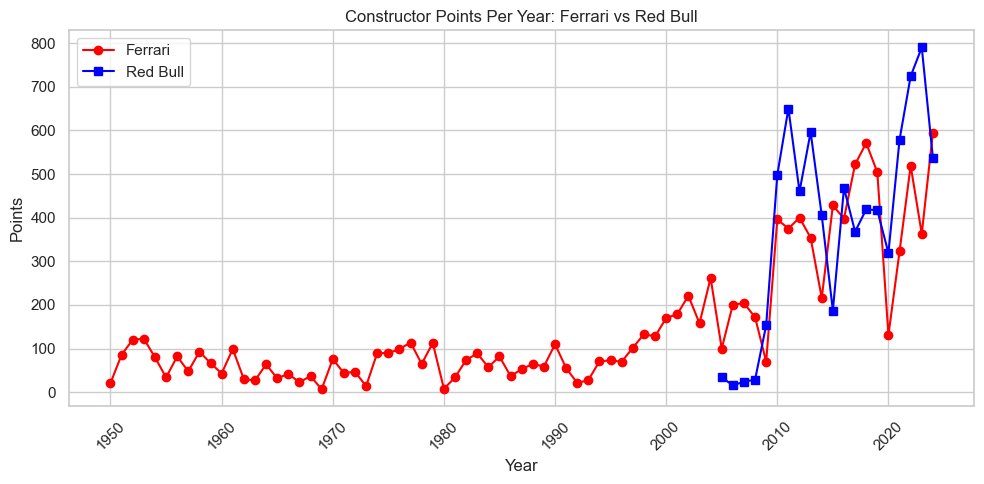

In [143]:
# Filter data
ferrari_df = constructor_points_yearly[constructor_points_yearly['name_constructor'] == 'Ferrari']
redbull_df = constructor_points_yearly[constructor_points_yearly['name_constructor'] == 'Red Bull']

# Plot
plt.figure(figsize=(10, 5))
plt.plot(ferrari_df['year'], ferrari_df['points'], marker='o', label='Ferrari', color='red')
plt.plot(redbull_df['year'], redbull_df['points'], marker='s', label='Red Bull', color='blue')

plt.title('Constructor Points Per Year: Ferrari vs Red Bull')
plt.xlabel('Year')
plt.ylabel('Points')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [144]:
# Wins per Constructor (All Time)

df['position'] = pd.to_numeric(df['position'], errors='coerce')

# Filter only winners
df_wins = df[df['position'] == 1]

# Group by constructor and count wins
constructor_wins = df_wins.groupby('name_constructor').size().reset_index(name='wins')

# Sort by most wins
constructor_wins = constructor_wins.sort_values(by='wins', ascending=False)

# Preview top teams
constructor_wins.head(10)

,name_constructor,wins
16,Ferrari,249
30,McLaren,185
32,Mercedes,129
36,Red Bull,122
45,Williams,114
40,Team Lotus,45
37,Renault,35
5,Benetton,27
6,Brabham,23
42,Tyrrell,23


In [145]:
constructor_wins.to_csv('../data/cleaned/constructor_total_wins.csv', index=False)

In [146]:
# Most Dominant Constructor Each Year

# Count number of wins per constructor per year
yearly_constructor_wins = df.groupby(['year', 'name_constructor']).size().reset_index(name='wins')

# For each year, find the team with most wins
most_dominant = yearly_constructor_wins.sort_values(['year', 'wins'], ascending=[True, False]).groupby('year').first().reset_index()

# Preview
most_dominant.head(10)

,year,name_constructor,wins
0,1950,Talbot-Lago,37
1,1951,Talbot-Lago,45
2,1952,Ferrari,49
3,1953,Ferrari,48
4,1954,Maserati,67
5,1955,Maserati,51
6,1956,Maserati,69
7,1957,Maserati,61
8,1958,Maserati,53
9,1959,Cooper-Climax,49


In [147]:
most_dominant.to_csv('../data/cleaned/most_dominant_constructor_by_year.csv', index=False)


In [148]:
import seaborn as sns

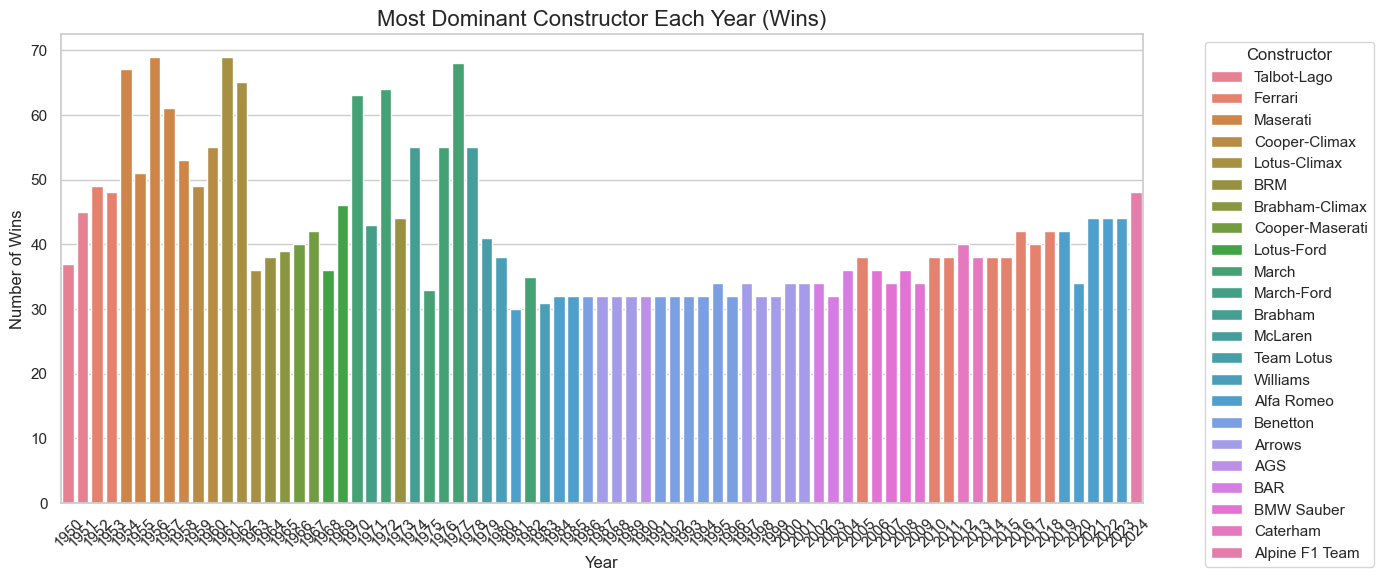

In [149]:
# Visualization: Most Dominant Constructor by Year

# Set plot style
sns.set(style='whitegrid', palette='pastel')

plt.figure(figsize=(14,6))
ax = sns.barplot(
        data=most_dominant,
        x='year',
        y='wins',
        hue='name_constructor',
        dodge=False
    )

# Add labels
plt.title('Most Dominant Constructor Each Year (Wins)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

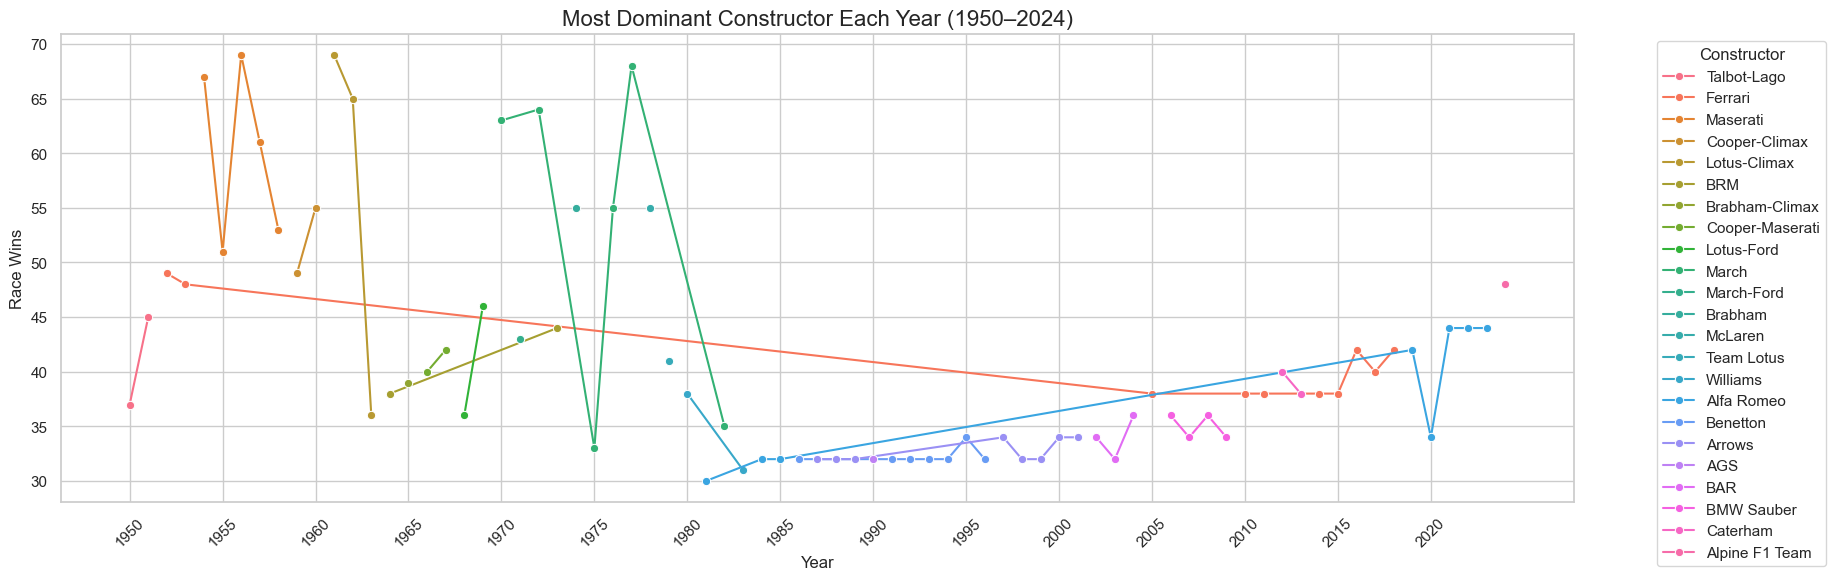

In [150]:
plt.figure(figsize=(16, 6))
sns.lineplot(
    data=most_dominant,
    x='year',
    y='wins',
    hue='name_constructor',
    marker='o'
)

plt.title('Most Dominant Constructor Each Year (1950–2024)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Race Wins')
plt.xticks(ticks=range(1950, 2025, 5), rotation=45)  # Show every 5th year
plt.tight_layout()
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


/var/folders/mt/xrr07_4s60g1zswr8f0cq20r0000gn/T/ipykernel_55788/694819434.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


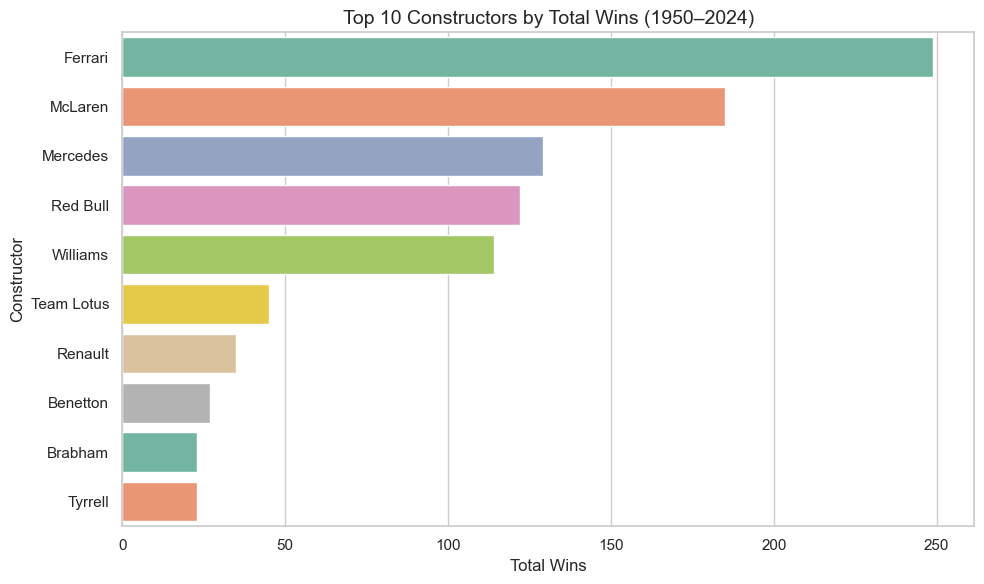

In [151]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=constructor_wins.sort_values(by='wins', ascending=False).head(10),
    x='wins',
    y='name_constructor',
    palette='Set2'
)
plt.title('Top 10 Constructors by Total Wins (1950–2024)', fontsize=14)
plt.xlabel('Total Wins')
plt.ylabel('Constructor')
plt.tight_layout()
plt.show()


In [152]:
df.head()

,year,grand_prix,forename,surname,name_constructor,position,points
0,2008,Australian Grand Prix,Lewis,Hamilton,McLaren,1.0,10.0
1,2008,Australian Grand Prix,Nick,Heidfeld,BMW Sauber,2.0,8.0
2,2008,Australian Grand Prix,Nico,Rosberg,Williams,3.0,6.0
3,2008,Australian Grand Prix,Fernando,Alonso,Renault,4.0,5.0
4,2008,Australian Grand Prix,Heikki,Kovalainen,McLaren,5.0,4.0


In [153]:
races_per_driver = df.groupby(['forename', 'surname'])[['year', 'grand_prix']].nunique().reset_index()
races_per_driver = races_per_driver.rename(columns={'year': 'years_active', 'grand_prix': 'total_races'})

races_per_driver.sort_values(by='total_races', ascending=False).head(10)


,forename,surname,years_active,total_races
170,Daniel,Ricciardo,14,40
831,Valtteri,Bottas,12,40
768,Sergio,Pérez,14,39
765,Sebastian,Vettel,16,39
523,Lewis,Hamilton,18,39
571,Max,Verstappen,10,38
128,Carlos,Sainz,10,38
501,Kevin,Magnussen,10,38
502,Kimi,Räikkönen,19,38
694,Pierre,Gasly,8,37


In [154]:
# Driver Consistency Analysis

# Create a unique race identifier
df['race_uid'] = df['year'].astype(str) + '_' + df['grand_prix']

# Now count how many unique races each driver participated in
races_per_driver = df.groupby(['forename', 'surname'])['race_uid'].nunique().reset_index()
races_per_driver = races_per_driver.rename(columns={'race_uid': 'total_races'})

# Total points per driver
points_per_driver = df.groupby(['forename', 'surname'])['points'].sum().reset_index()
points_per_driver = points_per_driver.rename(columns={'points': 'total_points'})

# Merge
driver_stats = pd.merge(races_per_driver, points_per_driver, on=['forename', 'surname'])

# Calculate avg points
driver_stats['avg_points'] = driver_stats['total_points'] / driver_stats['total_races']

# Filter and sort
consistent_drivers = driver_stats[driver_stats['total_races'] >= 50]
consistent_drivers = consistent_drivers.sort_values(by='avg_points', ascending=False)

# Show top 10
consistent_drivers.head(10)


,forename,surname,total_races,total_points,avg_points
571,Max,Verstappen,209,2912.5,13.935407
523,Lewis,Hamilton,356,4820.5,13.540730
765,Sebastian,Vettel,300,3098.0,10.326667
132,Charles,Leclerc,149,1363.0,9.147651
614,Nico,Rosberg,206,1594.5,7.740291
511,Lando,Norris,128,950.0,7.421875
831,Valtteri,Bottas,247,1788.0,7.238866
128,Carlos,Sainz,208,1203.5,5.786058
256,Fernando,Alonso,404,2329.0,5.764851
768,Sergio,Pérez,283,1585.0,5.600707


/var/folders/mt/xrr07_4s60g1zswr8f0cq20r0000gn/T/ipykernel_55788/2595291921.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


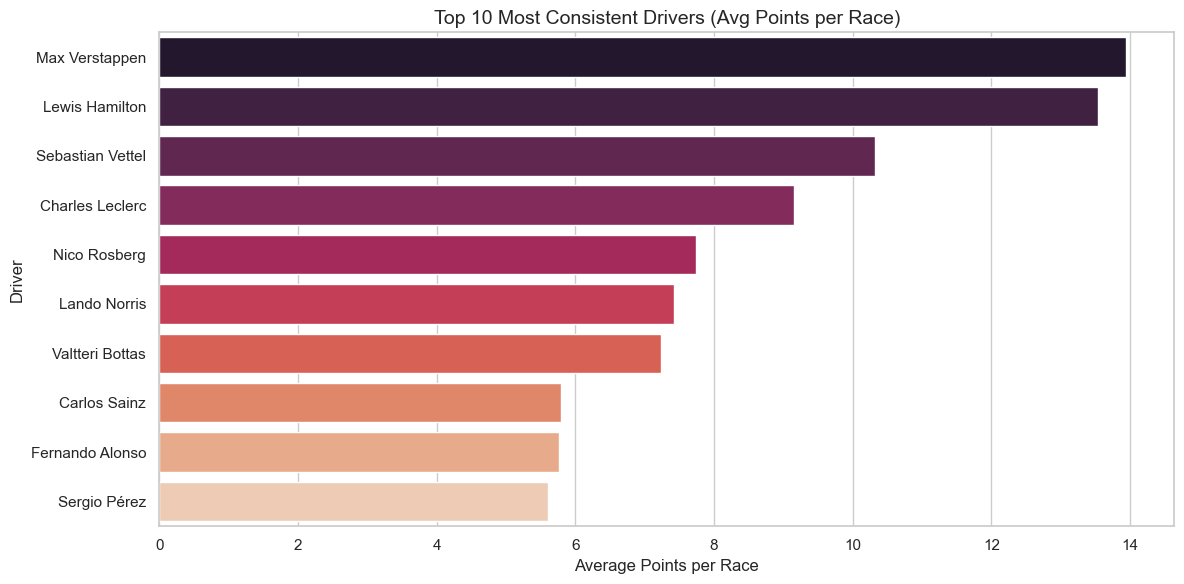

In [155]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=consistent_drivers.head(10),
    x='avg_points',
    y=consistent_drivers.head(10)['forename'] + ' ' + consistent_drivers.head(10)['surname'],
    palette='rocket'
)

plt.title('Top 10 Most Consistent Drivers (Avg Points per Race)', fontsize=14)
plt.xlabel('Average Points per Race')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()

In [156]:
results = pd.read_csv('../data/archive/results.csv')
races = pd.read_csv('../data/archive/races.csv')
drivers = pd.read_csv('../data/archive/drivers.csv')

In [157]:
races_clean = races[['raceId', 'year', 'name']].rename(columns={'name': 'grand_prix'})
races_clean['race_uid'] = races_clean['year'].astype(str) + '_' + races_clean['grand_prix']

In [158]:
# Join results with races to get race_uid into results
results_full = results.merge(races_clean[['raceId', 'race_uid']], on='raceId', how='left')

In [159]:
results_full = results_full.merge(
    drivers[['driverId', 'forename', 'surname']],
    on='driverId',
    how='left'
)

In [160]:
# Now join results_full with df using race_uid + forename + surname
df = df.merge(
    results_full[['race_uid', 'forename', 'surname', 'grid', 'position']],
    on=['race_uid', 'forename', 'surname'],
    how='left'
)

In [162]:
df.head()

,year,grand_prix,forename,surname,name_constructor,position_x,points,race_uid,grid,position_y
0,2008,Australian Grand Prix,Lewis,Hamilton,McLaren,1.0,10.0,2008_Australian Grand Prix,1,1
1,2008,Australian Grand Prix,Nick,Heidfeld,BMW Sauber,2.0,8.0,2008_Australian Grand Prix,5,2
2,2008,Australian Grand Prix,Nico,Rosberg,Williams,3.0,6.0,2008_Australian Grand Prix,7,3
3,2008,Australian Grand Prix,Fernando,Alonso,Renault,4.0,5.0,2008_Australian Grand Prix,11,4
4,2008,Australian Grand Prix,Heikki,Kovalainen,McLaren,5.0,4.0,2008_Australian Grand Prix,3,5


In [164]:
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [165]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [166]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [167]:
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [168]:
# Rename grid and position_y to meaningful names
df.rename(columns={
    'grid': 'starting_grid',
    'position_y': 'final_position'
}, inplace=True)

# Drop unnecessary columns
df.drop(columns=['position_x'], inplace=True)

In [169]:
df['final_position'] = pd.to_numeric(df['final_position'], errors='coerce')

In [170]:
# Step 1: Filter only drivers who started from pole
pole_starts = df[df['starting_grid'] == 1]

# Step 2: Drop duplicates — one row per race per driver
pole_starts = pole_starts.drop_duplicates(subset=['race_uid', 'forename', 'surname'])

# Step 3: From those, filter the ones who won
pole_wins = pole_starts[pole_starts['final_position'] == 1]

# Step 4: Count total poles per driver
pole_stats = pole_starts.groupby(['forename', 'surname']).size().reset_index(name='total_poles')

# Step 5: Count pole wins per driver
win_stats = pole_wins.groupby(['forename', 'surname']).size().reset_index(name='pole_wins')

# Step 6: Merge
conversion_df = pd.merge(pole_stats, win_stats, on=['forename', 'surname'], how='left')
conversion_df['pole_wins'] = conversion_df['pole_wins'].fillna(0)

# Step 7: Calculate conversion rate
conversion_df['conversion_rate'] = conversion_df['pole_wins'] / conversion_df['total_poles']

# Step 8: Filter for drivers with at least 10 poles
conversion_df = conversion_df[conversion_df['total_poles'] >= 10]

# Step 9: Sort
conversion_df = conversion_df.sort_values(by='conversion_rate', ascending=False)

# Preview
conversion_df.head(10)


,forename,surname,total_poles,pole_wins,conversion_rate
71,Max,Verstappen,40,32.0,0.800000
2,Alberto,Ascari,14,9.0,0.642857
27,Fernando,Alonso,22,14.0,0.636364
72,Michael,Schumacher,68,40.0,0.588235
64,Lewis,Hamilton,104,61.0,0.586538
0,Alain,Prost,33,18.0,0.545455
98,Sebastian,Vettel,57,31.0,0.543860
82,Nigel,Mansell,32,17.0,0.531250
42,James,Hunt,14,7.0,0.500000
26,Felipe,Massa,16,8.0,0.500000


In [171]:
df['final_position'].value_counts(dropna=False).head(10)
print(df['final_position'].dtype)

float64


In [172]:
status = pd.read_csv('../data/archive/status.csv')

In [173]:
df = df.drop_duplicates()

In [174]:
df = df.drop_duplicates(subset=['race_uid', 'forename', 'surname'])

In [175]:
df.head()

,year,grand_prix,forename,surname,name_constructor,points,race_uid,starting_grid,final_position
0,2008,Australian Grand Prix,Lewis,Hamilton,McLaren,10.0,2008_Australian Grand Prix,1,1.0
1,2008,Australian Grand Prix,Nick,Heidfeld,BMW Sauber,8.0,2008_Australian Grand Prix,5,2.0
2,2008,Australian Grand Prix,Nico,Rosberg,Williams,6.0,2008_Australian Grand Prix,7,3.0
3,2008,Australian Grand Prix,Fernando,Alonso,Renault,5.0,2008_Australian Grand Prix,11,4.0
4,2008,Australian Grand Prix,Heikki,Kovalainen,McLaren,4.0,2008_Australian Grand Prix,3,5.0


In [176]:
df[df['surname'] == 'Hamilton'].head(5)

,year,grand_prix,forename,surname,name_constructor,points,race_uid,starting_grid,final_position
0,2008,Australian Grand Prix,Lewis,Hamilton,McLaren,10.0,2008_Australian Grand Prix,1,1.0
26,2008,Malaysian Grand Prix,Lewis,Hamilton,McLaren,4.0,2008_Malaysian Grand Prix,9,5.0
56,2008,Bahrain Grand Prix,Lewis,Hamilton,McLaren,0.0,2008_Bahrain Grand Prix,3,13.0
68,2008,Spanish Grand Prix,Lewis,Hamilton,McLaren,6.0,2008_Spanish Grand Prix,5,3.0
89,2008,Turkish Grand Prix,Lewis,Hamilton,McLaren,8.0,2008_Turkish Grand Prix,3,2.0


In [177]:
# Create race_uid for merging
races['race_uid'] = races['year'].astype(str) + '_' + races['name']
results = results.merge(races[['raceId', 'race_uid']], on='raceId', how='left')
results = results.merge(drivers[['driverId', 'forename', 'surname']], on='driverId', how='left')

# Merge statusId into your df
df = df.merge(results[['race_uid', 'forename', 'surname', 'statusId']], 
              on=['race_uid', 'forename', 'surname'], how='left')

In [178]:
df = df.merge(status, on='statusId', how='left')  # adds `status` column

In [179]:
df.head()

,year,grand_prix,forename,surname,name_constructor,points,race_uid,starting_grid,final_position,statusId,status
0,2008,Australian Grand Prix,Lewis,Hamilton,McLaren,10.0,2008_Australian Grand Prix,1,1.0,1,Finished
1,2008,Australian Grand Prix,Nick,Heidfeld,BMW Sauber,8.0,2008_Australian Grand Prix,5,2.0,1,Finished
2,2008,Australian Grand Prix,Nico,Rosberg,Williams,6.0,2008_Australian Grand Prix,7,3.0,1,Finished
3,2008,Australian Grand Prix,Fernando,Alonso,Renault,5.0,2008_Australian Grand Prix,11,4.0,1,Finished
4,2008,Australian Grand Prix,Heikki,Kovalainen,McLaren,4.0,2008_Australian Grand Prix,3,5.0,1,Finished


In [180]:
# Add DNF indicator

df['DNF'] = df['status'].apply(lambda x: 0 if str(x).strip().lower() == 'finished' else 1)

In [181]:
# Group and calculate DNF rate

dnf_stats = df.groupby(['forename', 'surname'])['DNF'].agg(
    total_races='count',
    total_DNFs='sum'
).reset_index()

dnf_stats['DNF_rate'] = dnf_stats['total_DNFs'] / dnf_stats['total_races']

dnf_stats = dnf_stats[dnf_stats['total_races'] >= 60]

dnf_stats = dnf_stats.sort_values(by='DNF_rate', ascending=False)

dnf_stats.head(10)

,forename,surname,total_races,total_DNFs,DNF_rate
684,Philippe,Alliot,115,115,1.000000
628,Olivier,Grouillard,62,62,1.000000
687,Piercarlo,Ghinzani,111,111,1.000000
467,Jonathan,Palmer,88,88,1.000000
276,Gabriele,Tarquini,78,78,1.000000
688,Pierluigi,Martini,123,122,0.991870
829,Ukyo,Katayama,97,96,0.989691
27,Alex,Caffi,75,74,0.986667
4,Aguri,Suzuki,88,86,0.977273
73,Bertrand,Gachot,84,82,0.976190


In [182]:
# Average Finish Position per Driver 🏁

# Filter out nulls from final_position
df_filtered = df[df['final_position'].notna()]

# Group by driver and calculate average finish
avg_finish = df_filtered.groupby(['forename', 'surname'])['final_position'].agg(
    total_races='count',
    avg_finish_position='mean'
).reset_index()

avg_finish = avg_finish[avg_finish['total_races'] >= 30]
avg_finish = avg_finish.sort_values(by='avg_finish_position').round(2)

avg_finish.head(10)

,forename,surname,total_races,avg_finish_position
351,Juan,Fangio,44,2.73
279,Jackie,Stewart,63,2.95
5,Alain,Prost,143,2.96
41,Ayrton,Senna,108,3.15
593,Stirling,Moss,32,3.50
426,Max,Verstappen,179,3.55
385,Lewis,Hamilton,326,3.64
430,Michael,Schumacher,241,3.70
439,Mike,Hawthorn,32,3.75
303,Jim,Clark,51,3.90


/var/folders/mt/xrr07_4s60g1zswr8f0cq20r0000gn/T/ipykernel_55788/861748651.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


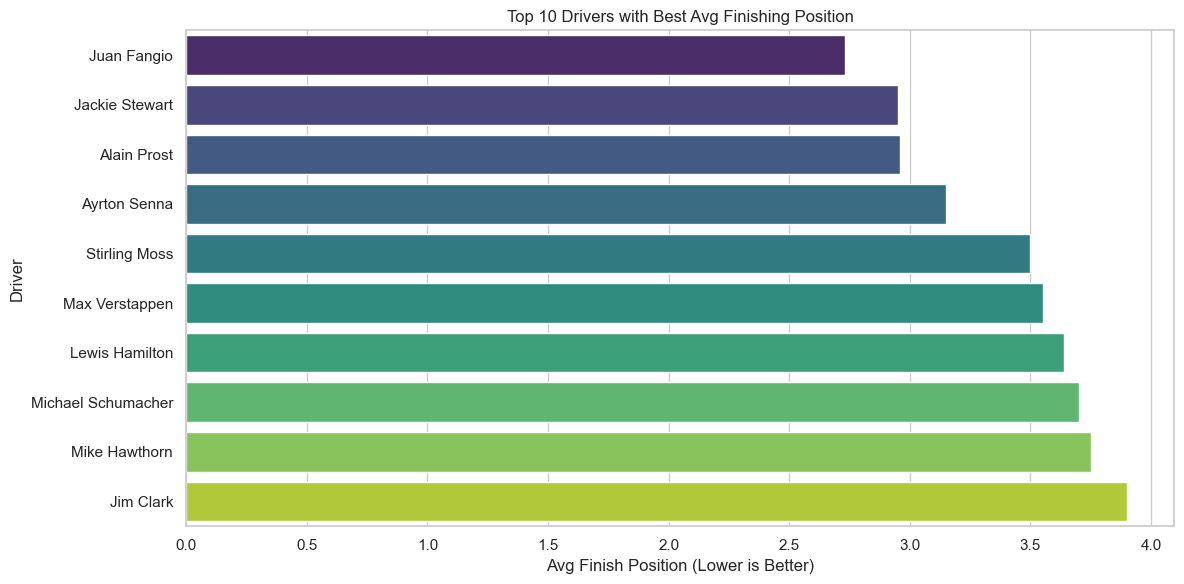

In [183]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_finish.head(10),
    x='avg_finish_position',
    y=avg_finish.head(10)['forename'] + ' ' + avg_finish.head(10)['surname'],
    palette='viridis'
)

plt.title('Top 10 Drivers with Best Avg Finishing Position')
plt.xlabel('Avg Finish Position (Lower is Better)')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()

In [184]:
# Driver vs Teammate Comparison

team_comp = df[['year', 'name_constructor', 'forename', 'surname', 'points']].copy()

# Group by season + constructor + driver
team_comp_summary = team_comp.groupby(['year', 'name_constructor', 'forename', 'surname'])['points'].sum().reset_index()

# Rank drivers within team per year
team_comp_summary['driver_name'] = team_comp_summary['forename'] + ' ' + team_comp_summary['surname']
team_comp_summary['team_rank'] = team_comp_summary.groupby(['year', 'name_constructor'])['points'].rank(method='dense', ascending=False)

# Filter Teams with Exactly 2 Drivers
driver_counts = team_comp_summary.groupby(['year', 'name_constructor']).size().reset_index(name='driver_count')
teams_with_two = driver_counts[driver_counts['driver_count'] == 2]

# Keep only those teams
team_comp_summary = team_comp_summary.merge(
    teams_with_two[['year', 'name_constructor']],
    on=['year', 'name_constructor'],
    how='inner'
)

# Pivot Names and Points Separately
name_pivot = team_comp_summary.pivot_table(
    index=['year', 'name_constructor'],
    columns='team_rank',
    values='driver_name',
    aggfunc='first'
).reset_index()
name_pivot.columns = ['year', 'constructor', 'Top Driver', 'Second Driver']

# Pivot for points
points_pivot = team_comp_summary.pivot_table(
    index=['year', 'name_constructor'],
    columns='team_rank',
    values='points',
    aggfunc='first'
).reset_index()
points_pivot.columns = ['year', 'constructor', 'Driver1_pts', 'Driver2_pts']

#  Merge Names + Points into One Table
final_team_comparison = name_pivot.merge(points_pivot, on=['year', 'constructor'])
final_team_comparison['point_diff'] = final_team_comparison['Driver1_pts'] - final_team_comparison['Driver2_pts']
final_team_comparison = final_team_comparison.sort_values(by='point_diff', ascending=False)

final_team_comparison.head(10)

,year,constructor,Top Driver,Second Driver,Driver1_pts,Driver2_pts,point_diff
470,2023,Red Bull,Max Verstappen,Sergio Pérez,530.0,260.0,270.0
475,2024,Red Bull,Max Verstappen,Sergio Pérez,399.0,138.0,261.0
453,2021,Red Bull,Max Verstappen,Sergio Pérez,388.5,190.0,198.5
388,2013,Red Bull,Sebastian Vettel,Mark Webber,397.0,199.0,198.0
452,2021,Mercedes,Lewis Hamilton,Valtteri Bottas,385.5,219.0,166.5
426,2018,Mercedes,Lewis Hamilton,Valtteri Bottas,408.0,247.0,161.0
372,2012,Ferrari,Fernando Alonso,Felipe Massa,278.0,122.0,156.0
462,2022,Red Bull,Max Verstappen,Sergio Pérez,433.0,291.0,142.0
363,2011,Ferrari,Fernando Alonso,Felipe Massa,257.0,118.0,139.0
367,2011,Red Bull,Sebastian Vettel,Mark Webber,392.0,258.0,134.0


In [185]:
#  Circuit-Based Driver Performance 🏟️

track_perf = df[df['final_position'] == 1].copy()

# Group by grand prix and driver
track_wins = track_perf.groupby(['grand_prix', 'forename', 'surname']).size().reset_index(name='wins')

# Sort by most wins on a single circuit
track_wins = track_wins.sort_values(by='wins', ascending=False)

track_wins.head(10)

,grand_prix,forename,surname,wins
176,British Grand Prix,Lewis,Hamilton,9
303,French Grand Prix,Michael,Schumacher,8
363,Hungarian Grand Prix,Lewis,Hamilton,8
546,San Marino Grand Prix,Michael,Schumacher,7
215,Canadian Grand Prix,Michael,Schumacher,7
213,Canadian Grand Prix,Lewis,Hamilton,7
436,Japanese Grand Prix,Michael,Schumacher,6
126,Brazilian Grand Prix,Alain,Prost,6
643,United States Grand Prix,Lewis,Hamilton,6
272,European Grand Prix,Michael,Schumacher,6


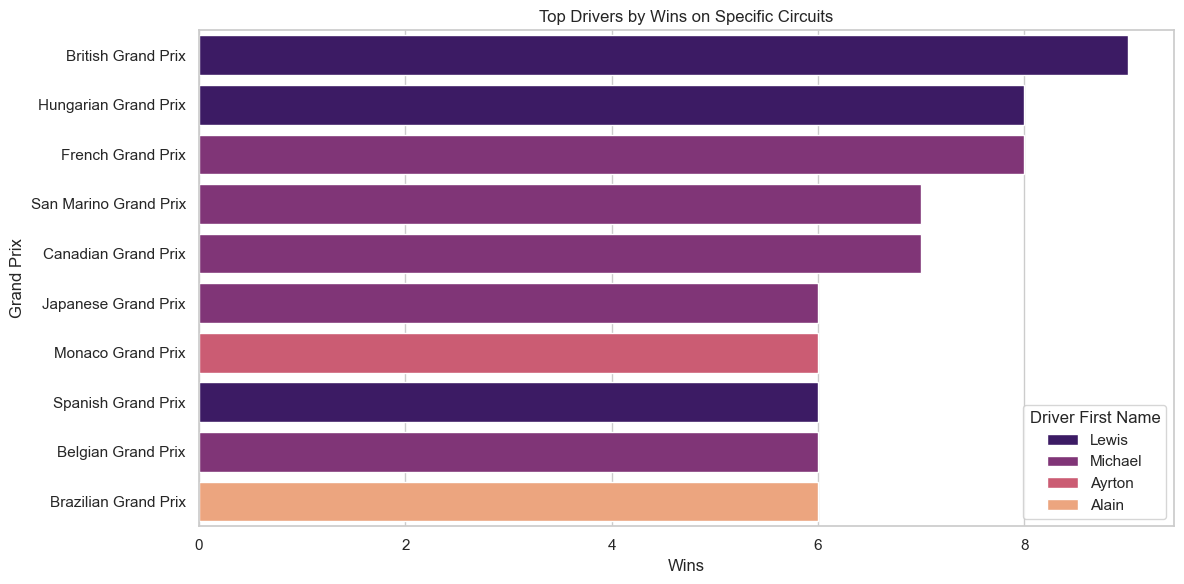

In [186]:
plt.figure(figsize=(12, 6))
top_circuit_drivers = track_wins.groupby('grand_prix').first().reset_index()

sns.barplot(
    data=top_circuit_drivers.sort_values('wins', ascending=False).head(10),
    x='wins',
    y='grand_prix',
    hue='forename',
    dodge=False,
    palette='magma'
)

plt.title('Top Drivers by Wins on Specific Circuits')
plt.xlabel('Wins')
plt.ylabel('Grand Prix')
plt.legend(title='Driver First Name', loc='lower right')
plt.tight_layout()
plt.show()

In [187]:
# Best Constructors per Circuit 🏁🏢

constructor_track_perf = df[df['final_position'] == 1]

# Group by constructor and grand prix
constructor_wins = constructor_track_perf.groupby(['grand_prix', 'name_constructor']).size().reset_index(name='wins')

# Sort to find most dominant teams on certain tracks
constructor_wins = constructor_wins.sort_values(by='wins', ascending=False)
constructor_wins.head(10)

,grand_prix,name_constructor,wins
175,German Grand Prix,Ferrari,21
209,Italian Grand Prix,Ferrari,20
81,British Grand Prix,Ferrari,18
52,Belgian Grand Prix,Ferrari,18
157,French Grand Prix,Ferrari,17
275,Monaco Grand Prix,McLaren,15
85,British Grand Prix,McLaren,14
57,Belgian Grand Prix,McLaren,13
100,Canadian Grand Prix,Ferrari,12
192,Hungarian Grand Prix,McLaren,12


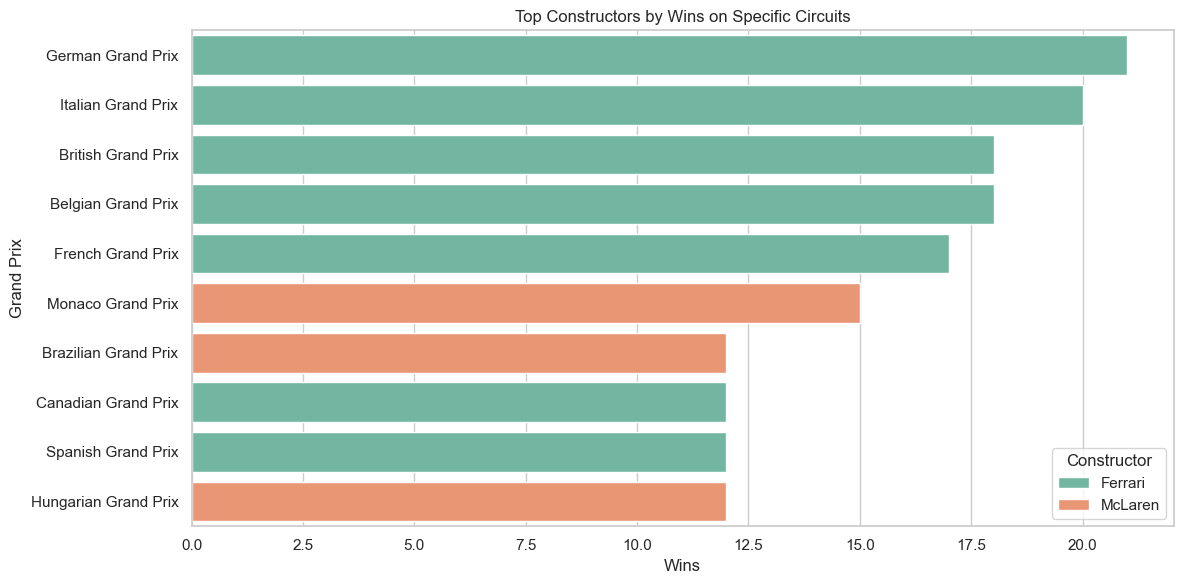

In [188]:
top_constructors = constructor_wins.groupby('grand_prix').first().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_constructors.sort_values('wins', ascending=False).head(10),
    x='wins',
    y='grand_prix',
    hue='name_constructor',
    dodge=False,
    palette='Set2'
)

plt.title('Top Constructors by Wins on Specific Circuits')
plt.xlabel('Wins')
plt.ylabel('Grand Prix')
plt.legend(title='Constructor', loc='lower right')
plt.tight_layout()
plt.show()

In [189]:
# Average Finishing Position by Driver 📉🏁

finishers_df = df[df['final_position'].notna()].copy()

# Group by driver and calculate stats
avg_finish = finishers_df.groupby(['forename', 'surname']).agg(
    total_races=('final_position', 'count'),
    avg_pos=('final_position', 'mean')
).reset_index()

#  Filter for drivers with enough races (e.g., > 50)
avg_finish = avg_finish[avg_finish['total_races'] >= 50]

# Sort by best (lowest) average finishing position
avg_finish = avg_finish.sort_values(by='avg_pos').round(2)
avg_finish.head(10)

,forename,surname,total_races,avg_pos
279,Jackie,Stewart,63,2.95
5,Alain,Prost,143,2.96
41,Ayrton,Senna,108,3.15
426,Max,Verstappen,179,3.55
385,Lewis,Hamilton,326,3.64
430,Michael,Schumacher,241,3.70
303,Jim,Clark,51,3.90
461,Nigel,Mansell,98,3.92
452,Nelson,Piquet,122,4.14
352,Juan,Pablo Montoya,62,4.21


In [190]:
df.head()

,year,grand_prix,forename,surname,name_constructor,points,race_uid,starting_grid,final_position,statusId,status,DNF
0,2008,Australian Grand Prix,Lewis,Hamilton,McLaren,10.0,2008_Australian Grand Prix,1,1.0,1,Finished,0
1,2008,Australian Grand Prix,Nick,Heidfeld,BMW Sauber,8.0,2008_Australian Grand Prix,5,2.0,1,Finished,0
2,2008,Australian Grand Prix,Nico,Rosberg,Williams,6.0,2008_Australian Grand Prix,7,3.0,1,Finished,0
3,2008,Australian Grand Prix,Fernando,Alonso,Renault,5.0,2008_Australian Grand Prix,11,4.0,1,Finished,0
4,2008,Australian Grand Prix,Heikki,Kovalainen,McLaren,4.0,2008_Australian Grand Prix,3,5.0,1,Finished,0


In [191]:
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,race_uid
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,2009_Australian Grand Prix
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,2009_Malaysian Grand Prix
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,2009_Chinese Grand Prix
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,2009_Bahrain Grand Prix
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,2009_Spanish Grand Prix


In [192]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [193]:
# Age vs Performance 🎂🏎️

#  Convert date columns to datetime
drivers['dob'] = pd.to_datetime(drivers['dob'], errors='coerce')
races['date'] = pd.to_datetime(races['date'], errors='coerce')

races['race_uid'] = races['year'].astype(str) + '_' + races['name']
races['race_uid'] = races['race_uid'].str.strip()

df['race_uid'] = df['race_uid'].str.strip()

df_age = df.merge(
    races[['race_uid', 'date']],
    on='race_uid',
    how='left'
)

df_age = df_age.merge(
    drivers[['forename', 'surname', 'dob']],
    on=['forename', 'surname'],
    how='left'
)

# Calculate age at time of race
df_age['age'] = (df_age['date'] - df_age['dob']).dt.total_seconds() // (365.25 * 24 * 60 * 60)
df_age['age'] = df_age['age'].astype(int)

# Group by age and calculate average points
age_perf = df_age.groupby('age')['points'].mean().reset_index()
age_perf.head(10)

,age,points
0,17,2.285714
1,18,4.717949
2,19,2.019802
3,20,1.882129
4,21,2.475610
5,22,1.476293
6,23,1.906641
7,24,2.287981
8,25,2.206174
9,26,2.144232


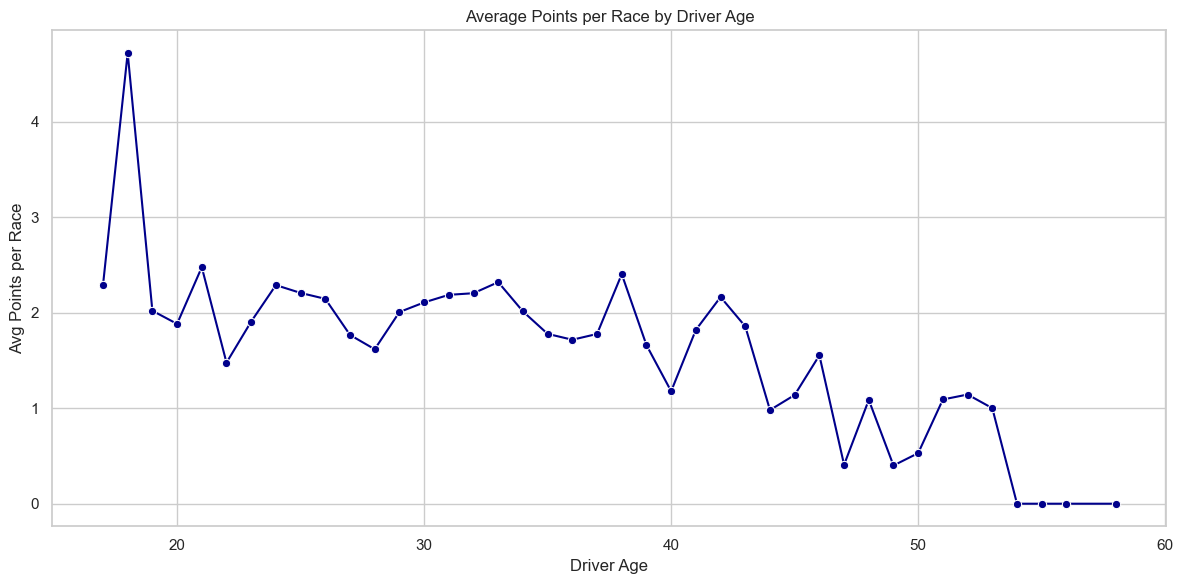

In [194]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=age_perf, x='age', y='points', marker='o', color='darkblue')

plt.title('Average Points per Race by Driver Age')
plt.xlabel('Driver Age')
plt.ylabel('Avg Points per Race')
plt.grid(True)
plt.tight_layout()
plt.show()

In [195]:
# Most Aggressive Overtakers 🔄

df['position_gain'] = df['starting_grid'] - df['final_position']
df_gain = df[df['final_position'].notna()]

overtakers = df_gain.groupby(['forename', 'surname']).agg(
    total_races=('position_gain', 'count'),
    avg_gain=('position_gain', 'mean')
).reset_index()

overtakers = overtakers[overtakers['total_races'] >= 50]
overtakers = overtakers.sort_values(by='avg_gain', ascending=False).round(2)
overtakers.head(10)

,forename,surname,total_races,avg_gain
408,Marc,Surer,51,8.27
318,Jochen,Mass,64,6.83
519,Pierluigi,Martini,55,6.40
299,Jean-Pierre,Jarier,63,6.37
435,Mika,Salo,64,5.83
332,John,Watson,90,5.80
29,Andrea,de Cesaris,71,5.70
150,Eddie,Cheever,55,5.58
416,Martin,Brundle,83,5.57
339,Johnny,Herbert,90,5.43


/var/folders/mt/xrr07_4s60g1zswr8f0cq20r0000gn/T/ipykernel_55788/1691932313.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


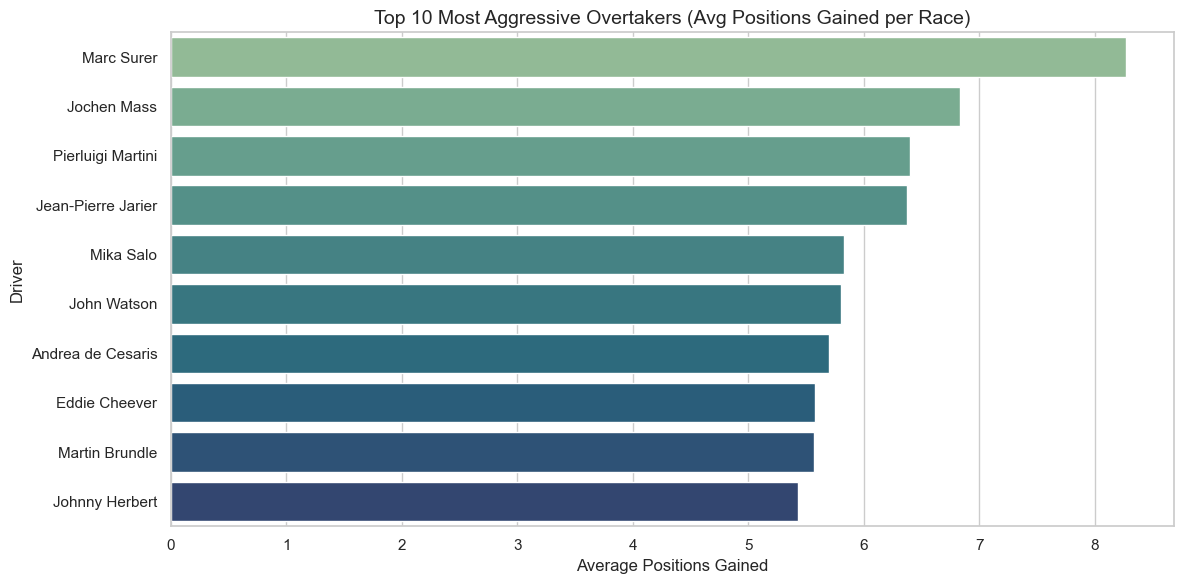

In [196]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=overtakers.head(10),
    x='avg_gain',
    y=overtakers.head(10)['forename'] + ' ' + overtakers.head(10)['surname'],
    palette='crest'
)

plt.title('Top 10 Most Aggressive Overtakers (Avg Positions Gained per Race)', fontsize=14)
plt.xlabel('Average Positions Gained')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()

In [197]:
df.head()

,year,grand_prix,forename,surname,name_constructor,points,race_uid,starting_grid,final_position,statusId,status,DNF,position_gain
0,2008,Australian Grand Prix,Lewis,Hamilton,McLaren,10.0,2008_Australian Grand Prix,1,1.0,1,Finished,0,0.0
1,2008,Australian Grand Prix,Nick,Heidfeld,BMW Sauber,8.0,2008_Australian Grand Prix,5,2.0,1,Finished,0,3.0
2,2008,Australian Grand Prix,Nico,Rosberg,Williams,6.0,2008_Australian Grand Prix,7,3.0,1,Finished,0,4.0
3,2008,Australian Grand Prix,Fernando,Alonso,Renault,5.0,2008_Australian Grand Prix,11,4.0,1,Finished,0,7.0
4,2008,Australian Grand Prix,Heikki,Kovalainen,McLaren,4.0,2008_Australian Grand Prix,3,5.0,1,Finished,0,-2.0


In [198]:
# Most Pole Positions Without a Win 🥶

pole_df = df[df['starting_grid'] == 1]
no_win_from_pole = pole_df[pole_df['final_position'] != 1]
pole_failures = no_win_from_pole.groupby(['forename', 'surname']).size().reset_index(name='pole_without_win')
pole_failures = pole_failures.sort_values(by='pole_without_win', ascending=False)
pole_failures.head(10)

,forename,surname,pole_without_win
61,Lewis,Hamilton,43
4,Ayrton,Senna,36
66,Michael,Schumacher,28
90,Sebastian,Vettel,26
55,Juan,Fangio,23
9,Charles,Leclerc,21
72,Nelson,Piquet,19
47,Jim,Clark,19
68,Mika,Häkkinen,16
85,René,Arnoux,16


In [199]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,race_uid,forename,surname
0,1,18,1,1,22,1,1,1,1,10.0,...,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008_Australian Grand Prix,Lewis,Hamilton
1,2,18,2,2,3,5,2,2,2,8.0,...,+5.478,5696094,41,3,1:27.739,217.586,1,2008_Australian Grand Prix,Nick,Heidfeld
2,3,18,3,3,7,7,3,3,3,6.0,...,+8.163,5698779,41,5,1:28.090,216.719,1,2008_Australian Grand Prix,Nico,Rosberg
3,4,18,4,4,5,11,4,4,4,5.0,...,+17.181,5707797,58,7,1:28.603,215.464,1,2008_Australian Grand Prix,Fernando,Alonso
4,5,18,5,1,23,3,5,5,5,4.0,...,+18.014,5708630,43,1,1:27.418,218.385,1,2008_Australian Grand Prix,Heikki,Kovalainen


In [200]:
print(results['rank'].unique())

['2' '3' '5' '7' '1' '14' '8' '4' '9' '13' '15' '16' '6' '11' '10' '17'
 '\\N' '12' '18' '19' '20' '21' '22' '23' '24' '0']


In [201]:
# Fastest Lap Kings

results['rank'] = pd.to_numeric(results['rank'], errors='coerce')
fastest_laps = results[results['rank'] == 1]
fastest_lap_counts = fastest_laps.groupby(['forename','surname'])['raceId'].count().reset_index(name='fastest_laps')
fastest_lap_counts = fastest_lap_counts.sort_values(by='fastest_laps', ascending=False)
fastest_lap_counts.head()

,forename,surname,fastest_laps
21,Lewis,Hamilton,66
19,Kimi,Räikkönen,42
35,Sebastian,Vettel,38
23,Max,Verstappen,33
9,Fernando,Alonso,25


In [202]:
circuits = pd.read_csv('../data/archive/circuits.csv')
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [203]:
# Who has the best fastest lap for each circuit?

# Add circuitId to results
results = results.merge(races[['raceId', 'circuitId']], on='raceId', how='left')

# Add circuit name
results = results.merge(circuits[['circuitId', 'name']], on='circuitId', how='left')
results.rename(columns={'name': 'circuit_name'}, inplace=True)

In [204]:
# Convert fastestLapTime to Seconds

def lap_to_seconds(lap_to_str):
    if isinstance(lap_to_str, str) and ':' in lap_to_str:
        mins, secs = lap_to_str.split(':')
        return int(mins) * 60 + float(secs)
    return None            

In [206]:
results['fastestLapSeconds'] = results['fastestLapTime'].apply(lap_to_seconds)

# Remove nulls
fastest_laps = results.dropna(subset=['fastestLapSeconds'])

# Get the row with min lap time per circuit
best_per_circuit = fastest_laps.loc[fastest_laps.groupby('circuit_name')['fastestLapSeconds'].idxmin()]

best_per_circuit = best_per_circuit.merge(
    drivers[['driverId', 'forename', 'surname']],
    on='driverId',
    how='left'
)

In [210]:
# Clean the best_per_circuit DataFrame
best_per_circuit_clean = best_per_circuit[[
    'circuit_name',
    'forename_y',
    'surname_y',
    'fastestLapTime',
    'fastestLapSeconds'
]].copy()

# Optional: Rename columns for clarity
best_per_circuit_clean.rename(columns={
    'forename_y': 'forename',
    'surname_y': 'surname'
}, inplace=True)

# Sort by lap time if needed
best_per_circuit_clean = best_per_circuit_clean.sort_values(by='fastestLapSeconds')

# Reset index for clean display
best_per_circuit_clean.reset_index(drop=True, inplace=True)

# Preview
best_per_circuit_clean.head(10)

,circuit_name,forename,surname,fastestLapTime,fastestLapSeconds
0,Bahrain International Circuit,George,Russell,0:55.404,55.404
1,Red Bull Ring,Carlos,Sainz,1:05.619,65.619
2,Indianapolis Motor Speedway,Rubens,Barrichello,1:10.399,70.399
3,Autódromo José Carlos Pace,Valtteri,Bottas,1:10.540,70.540
4,Circuit Park Zandvoort,Lewis,Hamilton,1:11.097,71.097
5,Circuit de Monaco,Lewis,Hamilton,1:12.909,72.909
6,Circuit Gilles Villeneuve,Valtteri,Bottas,1:13.078,73.078
7,Hockenheimring,Kimi,Räikkönen,1:13.780,73.780
8,Circuit de Nevers Magny-Cours,Michael,Schumacher,1:15.377,75.377
9,Autodromo Enzo e Dino Ferrari,Lewis,Hamilton,1:15.484,75.484


In [212]:
print(type(results))
print(type(races))
print(type(circuits))
print(type(drivers))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [213]:
results = pd.read_csv('../data/archive/results.csv')
races = pd.read_csv('../data/archive/races.csv')
circuits = pd.read_csv('../data/archive/circuits.csv')
drivers = pd.read_csv('../data/archive/drivers.csv')

In [216]:
for var_name in ['results', 'races', 'circuits', 'drivers']:
    try:
        print(f"{var_name}: {eval(var_name).shape}")
    except Exception as e:
        print(f"{var_name}: ERROR - {e}")

results: (26759, 18)
races: (1125, 18)
circuits: (77, 9)
drivers: (861, 9)


In [218]:
# Driver with Most Fastest Laps per Circuit 🏁💨

# Step 1: Filter only rows where driver achieved the fastest lap in a race
fastest_lap_winners = results[results['rank'].astype(str) == '1']

# Step 2: Merge with races to get the circuitId
fastest_lap_winners = fastest_lap_winners.merge(
    races[['raceId', 'circuitId']], on='raceId', how='left'
)

# Step 3: Merge with circuits to get the circuit name
fastest_lap_winners = fastest_lap_winners.merge(
    circuits[['circuitId', 'name']], on='circuitId', how='left'
)
fastest_lap_winners.rename(columns={'name': 'circuit_name'}, inplace=True)

# Step 4: Merge with drivers to get driver names
fastest_lap_winners = fastest_lap_winners.merge(
    drivers[['driverId', 'forename', 'surname']], on='driverId', how='left'
)

# Step 5: Count fastest laps for each driver per circuit
fastest_laps_count = fastest_lap_winners.groupby(
    ['circuit_name', 'forename', 'surname']
).size().reset_index(name='fastest_laps')

# Step 6: For each circuit, get the driver with the most fastest laps
most_fastest_per_circuit = fastest_laps_count.sort_values(
    ['circuit_name', 'fastest_laps'], ascending=[True, False]
).groupby('circuit_name').first().reset_index()

# Display the top few rows
most_fastest_per_circuit.head()

,circuit_name,forename,surname,fastest_laps
0,Albert Park Grand Prix Circuit,Kimi,Räikkönen,4
1,Autodromo Enzo e Dino Ferrari,Lewis,Hamilton,2
2,Autodromo Internazionale del Mugello,Lewis,Hamilton,1
3,Autodromo Nazionale di Monza,Lewis,Hamilton,7
4,Autódromo Hermanos Rodríguez,Charles,Leclerc,2


/var/folders/mt/xrr07_4s60g1zswr8f0cq20r0000gn/T/ipykernel_55788/1679314060.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


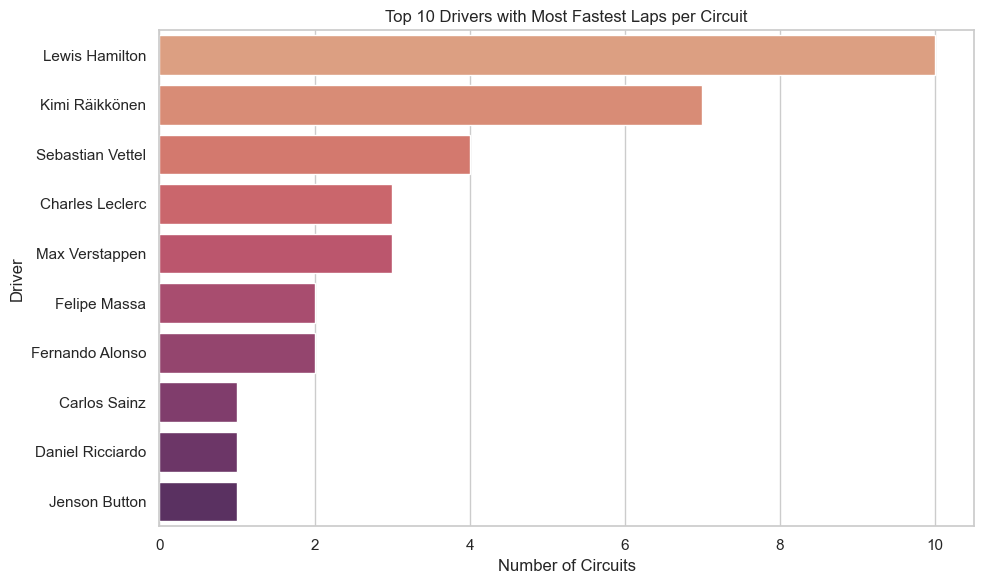

In [219]:
top_fastest = most_fastest_per_circuit['forename'] + ' ' + most_fastest_per_circuit['surname']
top_fastest_lap_counts = most_fastest_per_circuit.groupby(top_fastest).size().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_fastest_lap_counts.values,
    y=top_fastest_lap_counts.index,
    palette='flare'
)
plt.title('Top 10 Drivers with Most Fastest Laps per Circuit')
plt.xlabel('Number of Circuits')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()

In [221]:
constructors = pd.read_csv('../data/archive/constructors.csv')

In [223]:
# Constructors with Most Wins per Country.

winners = results[results['position'].astype(str) == '1']

# Step 2: Merge with races to get circuitId and year
winners = winners.merge(
    races[['raceId', 'circuitId', 'year']],
    on='raceId',
    how='left'
)

# Step 3: Merge with circuits to get country
winners = winners.merge(
    circuits[['circuitId', 'location', 'country']],
    on='circuitId',
    how='left'
)

# Step 4: Merge with constructors to get constructor names
winners = winners.merge(constructors[['constructorId', 'name']], on='constructorId', how='left')

# Step 5: Group by country and constructor name
constructor_wins_per_country = winners.groupby(['country', 'name']).size().reset_index(name='win_count')

# Step 6: Get the top constructor per country
top_constructors = constructor_wins_per_country.sort_values(['country', 'win_count'], ascending=[True, False]).groupby('country').first().reset_index()

top_constructors.head()

,country,name,win_count
0,Argentina,Ferrari,4
1,Australia,Ferrari,11
2,Austria,Mercedes,7
3,Azerbaijan,Red Bull,4
4,Bahrain,Ferrari,7


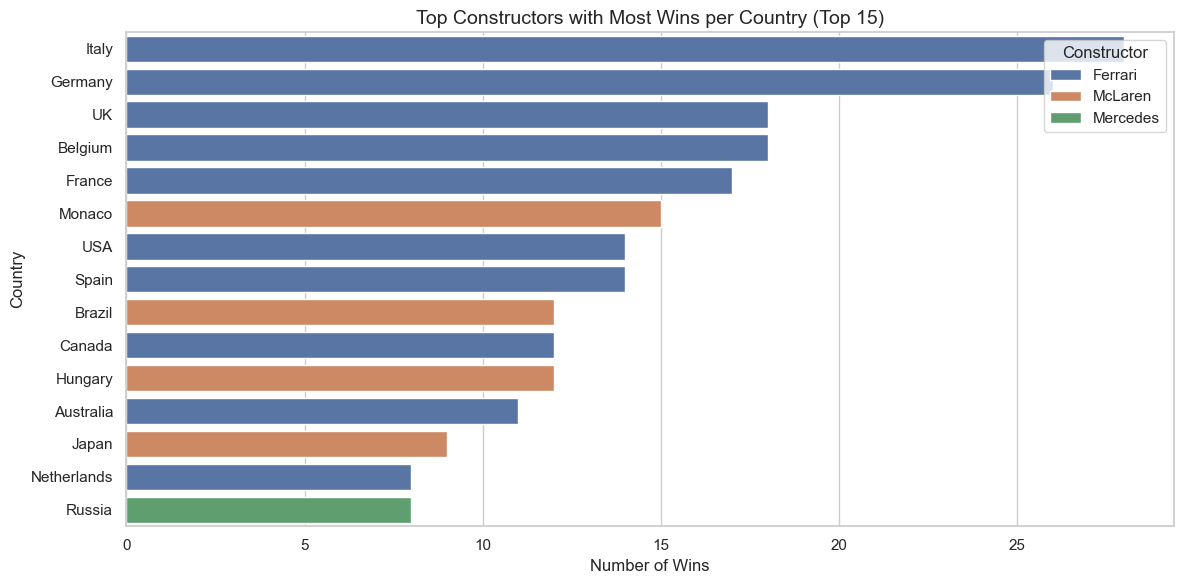

In [224]:
# Sort by win count and pick top 15 countries
top_15 = top_constructors.sort_values('win_count', ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_15,
    x='win_count',
    y='country',
    hue='name',
    dodge=False,
    palette='deep'
)

plt.title('Top Constructors with Most Wins per Country (Top 15)', fontsize=14)
plt.xlabel('Number of Wins')
plt.ylabel('Country')
plt.legend(title='Constructor', loc='upper right')
plt.tight_layout()
plt.show()

In [225]:
# Home Race Wins by Drivers

home_winners = results[results['position'].astype(str) == '1']

home_winners = home_winners.merge(races[['raceId', 'circuitId']], on='raceId', how='left')
home_winners = home_winners.merge(circuits[['circuitId', 'country']], on='circuitId', how='left')
home_winners = home_winners.merge(drivers[['driverId', 'forename', 'surname', 'nationality']], on='driverId', how='left')

# Match nationality with race country (approximate matching)
# We'll normalize both to lowercase for comparison

home_winners['is_home_win'] = home_winners.apply(
    lambda row: row['country'].lower() in row['nationality'].lower(), axis=1
)

home_wins = home_winners[home_winners['is_home_win'] == True]

home_win_count = home_wins.groupby(['forename', 'surname']).size().reset_index(name='home_wins')
home_win_count = home_win_count.sort_values(by='home_wins', ascending=False)
home_win_count.head(10)

,forename,surname,home_wins
0,Ayrton,Senna,2
2,Emerson,Fittipaldi,2
3,Felipe,Massa,2
5,Nelson,Piquet,2
1,Carlos,Pace,1
4,Jody,Scheckter,1
6,Niki,Lauda,1


/var/folders/mt/xrr07_4s60g1zswr8f0cq20r0000gn/T/ipykernel_55788/3055143156.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


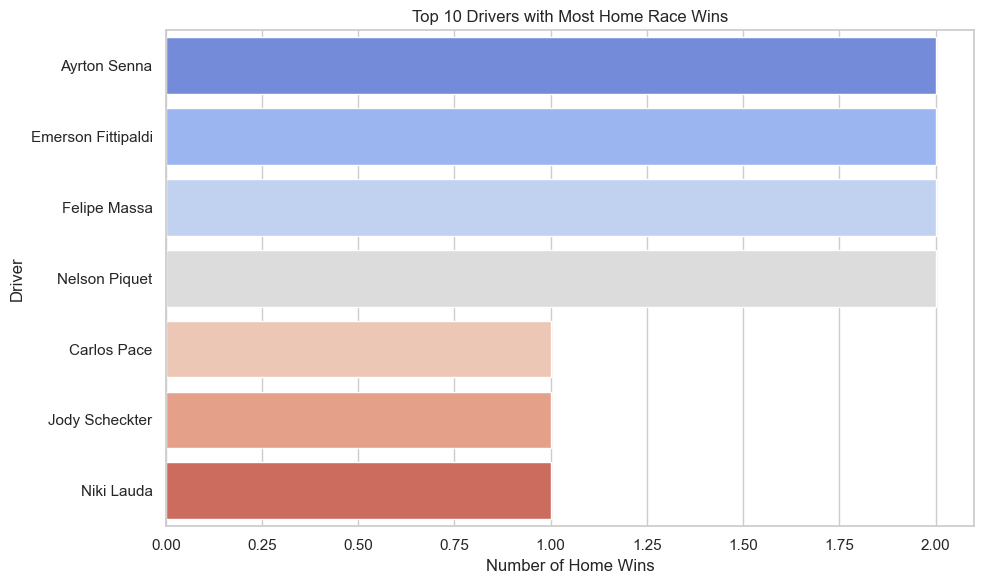

In [226]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=home_win_count.head(10),
    x='home_wins',
    y=home_win_count.head(10)['forename'] + ' ' + home_win_count.head(10)['surname'],
    palette='coolwarm'
)

plt.title('Top 10 Drivers with Most Home Race Wins')
plt.xlabel('Number of Home Wins')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()

In [229]:
# Map nationality to multiple country name variants
nationality_country_map = {
    'british': ['united kingdom', 'uk', 'great britain', 'england'],
    'german': ['germany'],
    'french': ['france'],
    'spanish': ['spain'],
    'italian': ['italy'],
    'finnish': ['finland'],
    'brazilian': ['brazil'],
    'australian': ['australia'],
    'canadian': ['canada'],
    'japanese': ['japan'],
    'mexican': ['mexico'],
    'dutch': ['netherlands'],
    'monegasque': ['monaco'],
    'austrian': ['austria'],
    'american': ['united states', 'usa'],
    'new zealander': ['new zealand'],
    'swiss': ['switzerland'],
    'polish': ['poland'],
    'russian': ['russia'],
    'chinese': ['china'],
    'indian': ['india'],
    'south african': ['south africa']
}


In [232]:
def is_home_win(row):
    nationality = row['nationality'].lower()
    race_country = row['country'].lower()
    possible_countries = nationality_country_map.get(nationality, [])
    return race_country in possible_countries

/var/folders/mt/xrr07_4s60g1zswr8f0cq20r0000gn/T/ipykernel_55788/2969301488.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


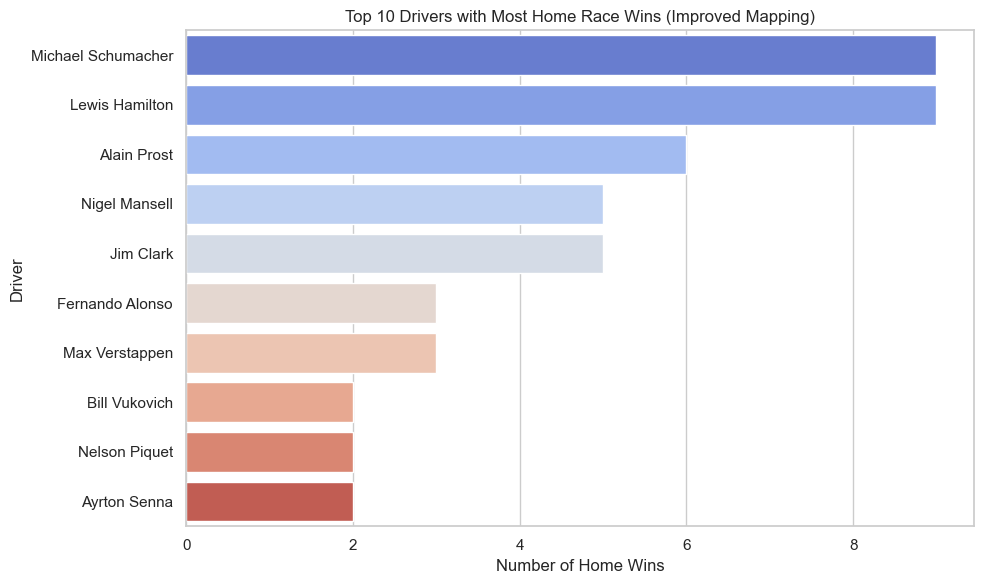

In [233]:
# Home Race Wins by Drivers

home_winners = results[results['position'].astype(str) == '1']

home_winners = home_winners.merge(races[['raceId', 'circuitId']], on='raceId', how='left')
home_winners = home_winners.merge(circuits[['circuitId', 'country']], on='circuitId', how='left')
home_winners = home_winners.merge(drivers[['driverId', 'forename', 'surname', 'nationality']], on='driverId', how='left')

# Match nationality with race country (approximate matching)
# We'll normalize both to lowercase for comparison

# Add the home win flag
home_winners['is_home_win'] = home_winners.apply(is_home_win, axis=1)

# Filter and group
home_wins = home_winners[home_winners['is_home_win']]
home_win_count = home_wins.groupby(['forename', 'surname']).size().reset_index(name='home_wins')
home_win_count = home_win_count.sort_values('home_wins', ascending=False)

# Visualize (if needed)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=home_win_count.head(10),
    x='home_wins',
    y=home_win_count.head(10)['forename'] + ' ' + home_win_count.head(10)['surname'],
    palette='coolwarm'
)
plt.title('Top 10 Drivers with Most Home Race Wins (Improved Mapping)')
plt.xlabel('Number of Home Wins')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()

In [234]:
df.head()

,year,grand_prix,forename,surname,name_constructor,points,race_uid,starting_grid,final_position,statusId,status,DNF,position_gain
0,2008,Australian Grand Prix,Lewis,Hamilton,McLaren,10.0,2008_Australian Grand Prix,1,1.0,1,Finished,0,0.0
1,2008,Australian Grand Prix,Nick,Heidfeld,BMW Sauber,8.0,2008_Australian Grand Prix,5,2.0,1,Finished,0,3.0
2,2008,Australian Grand Prix,Nico,Rosberg,Williams,6.0,2008_Australian Grand Prix,7,3.0,1,Finished,0,4.0
3,2008,Australian Grand Prix,Fernando,Alonso,Renault,5.0,2008_Australian Grand Prix,11,4.0,1,Finished,0,7.0
4,2008,Australian Grand Prix,Heikki,Kovalainen,McLaren,4.0,2008_Australian Grand Prix,3,5.0,1,Finished,0,-2.0


In [239]:
# Back-to-Back Wins (Driver Winning Streaks) 🏆🔥

# Step 1: Filter only winners
winners_streak = df[df['final_position'] == 1].copy()

# Step 2: Ensure race_uid is string type
winners_streak['race_uid'] = winners_streak['race_uid'].astype(str)

# Step 3: Split race_uid safely
split_cols = winners_streak['race_uid'].str.split('_', n=1, expand=True)
winners_streak['race_year'] = split_cols[0].astype(int)
winners_streak['race_name'] = split_cols[1]

# Step 4: Add round info by merging with races
races_clean = races[['year', 'name', 'round']].rename(columns={'name': 'race_name'})
winners_streak = winners_streak.merge(
    races_clean,
    left_on=['race_year', 'race_name'],
    right_on=['year', 'race_name'],
    how='left'
)

# Sort by driver, then by year and round
winners_streak = winners_streak.sort_values(by=['forename', 'surname', 'race_year', 'round']).reset_index(drop=True)

# Create unique driver key
winners_streak['driver'] = winners_streak['forename'] + ' ' + winners_streak['surname']

# Identify streaks (same driver, consecutive rounds)
winners_streak['prev_driver'] = winners_streak['driver'].shift()
winners_streak['prev_year'] = winners_streak['race_year'].shift()
winners_streak['prev_round'] = winners_streak['round'].shift()

# If not same driver or not consecutive round/year, new streak
winners_streak['new_streak'] = (
    (winners_streak['driver'] != winners_streak['prev_driver']) | 
    (winners_streak['race_year'] != winners_streak['prev_year']) |
    (winners_streak['round'] != winners_streak['prev_round'] + 1)
)

# Assign streak IDs
winners_streak['streak_id'] = winners_streak['new_streak'].cumsum()

# Group by streak_id and count
streaks = winners_streak.groupby(['streak_id', 'driver']).size().reset_index(name='streak_length')

streaks = streaks[streaks['streak_length'] >= 2].sort_values(by='streak_length', ascending=False)
streaks.head(10)

,streak_id,driver,streak_length
535,536,Max Verstappen,10
769,770,Sebastian Vettel,9
536,537,Max Verstappen,7
586,587,Michael Schumacher,7
47,48,Alberto Ascari,6
335,336,Jim Clark,5
585,586,Michael Schumacher,5
530,531,Max Verstappen,5
256,257,Jack Brabham,5
478,479,Lewis Hamilton,5


In [240]:
df.head()

,year,grand_prix,forename,surname,name_constructor,points,race_uid,starting_grid,final_position,statusId,status,DNF,position_gain
0,2008,Australian Grand Prix,Lewis,Hamilton,McLaren,10.0,2008_Australian Grand Prix,1,1.0,1,Finished,0,0.0
1,2008,Australian Grand Prix,Nick,Heidfeld,BMW Sauber,8.0,2008_Australian Grand Prix,5,2.0,1,Finished,0,3.0
2,2008,Australian Grand Prix,Nico,Rosberg,Williams,6.0,2008_Australian Grand Prix,7,3.0,1,Finished,0,4.0
3,2008,Australian Grand Prix,Fernando,Alonso,Renault,5.0,2008_Australian Grand Prix,11,4.0,1,Finished,0,7.0
4,2008,Australian Grand Prix,Heikki,Kovalainen,McLaren,4.0,2008_Australian Grand Prix,3,5.0,1,Finished,0,-2.0


In [243]:
pit_stops = pd.read_csv('../data/archive/pit_stops.csv')

In [244]:
pit_stops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [249]:
# Fastest Pit Stops ⛽⚡

pit_data = pit_stops.merge(drivers[['driverId', 'forename', 'surname']], on='driverId', how='left')
pit_data = pit_data.merge(races[['raceId', 'year', 'name']], on='raceId', how='left')

# Keep only valid durations (non-null, > 0)
pit_data = pit_data[pit_data['milliseconds'].notna() & (pit_data['milliseconds'] > 0)]

# Get fastest 10 pit stops
fastest_pit_stops = pit_data.sort_values(by='milliseconds')

In [250]:
fastest_pit_stops.head(10)

,raceId,driverId,stop,lap,time,duration,milliseconds,forename,surname,year,name
1037,858,813,2,30,17:58:49,12.897,12897,Pastor,Maldonado,2011,Abu Dhabi Grand Prix
1044,858,811,3,36,18:09:34,12.959,12959,Bruno,Senna,2011,Abu Dhabi Grand Prix
693,851,1,6,56,15:30:48,13.173,13173,Lewis,Hamilton,2011,Hungarian Grand Prix
632,851,813,2,16,14:31:22,13.186,13186,Pastor,Maldonado,2011,Hungarian Grand Prix
1640,870,30,2,4,14:12:58,13.199,13199,Michael,Schumacher,2012,Hungarian Grand Prix
655,851,815,3,32,14:56:05,13.201,13201,Sergio,Pérez,2011,Hungarian Grand Prix
1692,870,813,3,52,15:23:48,13.206,13206,Pastor,Maldonado,2012,Hungarian Grand Prix
1399,864,13,2,28,14:46:33,13.259,13259,Felipe,Massa,2012,Spanish Grand Prix
2330,884,813,2,13,14:23:55,13.266,13266,Pastor,Maldonado,2013,Spanish Grand Prix
1402,864,20,3,30,14:49:35,13.335,13335,Sebastian,Vettel,2012,Spanish Grand Prix


In [251]:
fastest_pit_stops['driver'] = fastest_pit_stops['forename'] + ' ' + fastest_pit_stops['surname']
fastest_pit_stops = fastest_pit_stops[['driver', 'year', 'name', 'stop', 'lap', 'duration', 'milliseconds']]

fastest_pit_stops.head(10)

,driver,year,name,stop,lap,duration,milliseconds
1037,Pastor Maldonado,2011,Abu Dhabi Grand Prix,2,30,12.897,12897
1044,Bruno Senna,2011,Abu Dhabi Grand Prix,3,36,12.959,12959
693,Lewis Hamilton,2011,Hungarian Grand Prix,6,56,13.173,13173
632,Pastor Maldonado,2011,Hungarian Grand Prix,2,16,13.186,13186
1640,Michael Schumacher,2012,Hungarian Grand Prix,2,4,13.199,13199
655,Sergio Pérez,2011,Hungarian Grand Prix,3,32,13.201,13201
1692,Pastor Maldonado,2012,Hungarian Grand Prix,3,52,13.206,13206
1399,Felipe Massa,2012,Spanish Grand Prix,2,28,13.259,13259
2330,Pastor Maldonado,2013,Spanish Grand Prix,2,13,13.266,13266
1402,Sebastian Vettel,2012,Spanish Grand Prix,3,30,13.335,13335


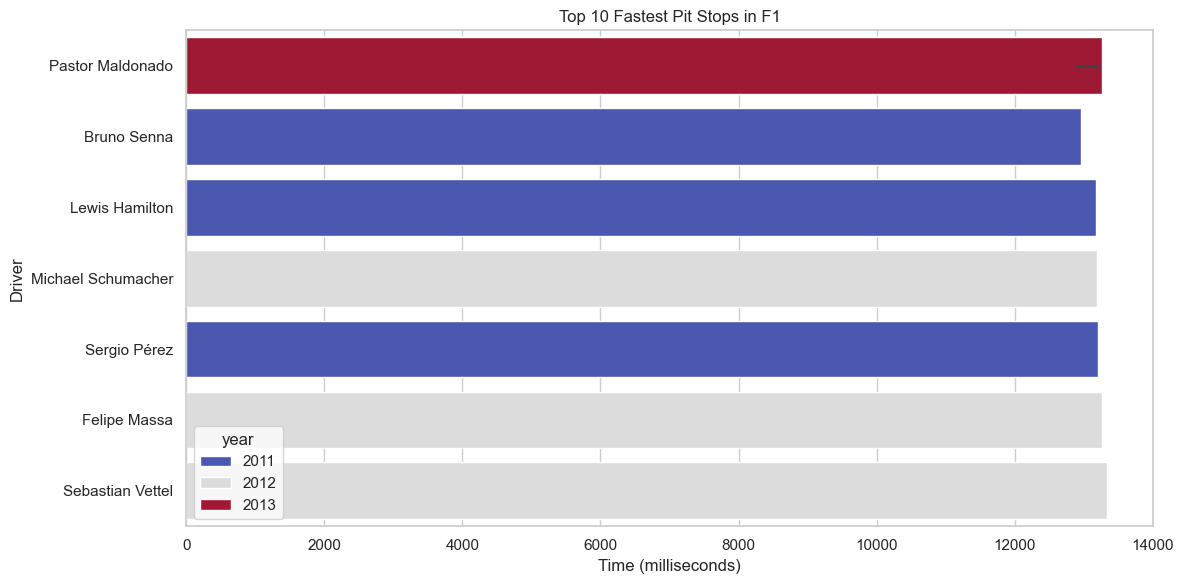

In [253]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=fastest_pit_stops.head(10),
    x='milliseconds',
    y='driver',
    hue='year',
    dodge=False,
    palette='coolwarm'
)
plt.title('Top 10 Fastest Pit Stops in F1')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()

In [255]:
# Merge to bring in year
results = results.merge(races[['raceId', 'year']], on='raceId', how='left')

In [256]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,2008
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,2008
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,2008
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,2008


In [257]:
# Drivers with the Longest Careers 🧓🏁

# Group by Driver to Find Career Start & End Years
career_span = results.groupby(['driverId'])['year'].agg(['min', 'max']).reset_index()
career_span['career_length'] = career_span['max'] - career_span['min']

career_span = career_span.merge(drivers[['driverId', 'forename', 'surname']], on='driverId', how='left')
career_span['driver'] = career_span['forename'] + ' ' + career_span['surname']

longest_careers = career_span.sort_values(by='career_length', ascending=False)
longest_careers = longest_careers[['driver', 'min', 'max', 'career_length']]
longest_careers.head(10)

,driver,min,max,career_length
3,Fernando Alonso,2001,2024,23
29,Michael Schumacher,1991,2012,21
7,Kimi Räikkönen,2001,2021,20
21,Rubens Barrichello,1993,2011,18
288,Graham Hill,1958,1975,17
17,Jenson Button,2000,2017,17
0,Lewis Hamilton,2007,2024,17
68,Luca Badoer,1993,2009,16
118,Riccardo Patrese,1977,1993,16
19,Sebastian Vettel,2007,2022,15


/var/folders/mt/xrr07_4s60g1zswr8f0cq20r0000gn/T/ipykernel_55788/1649786046.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


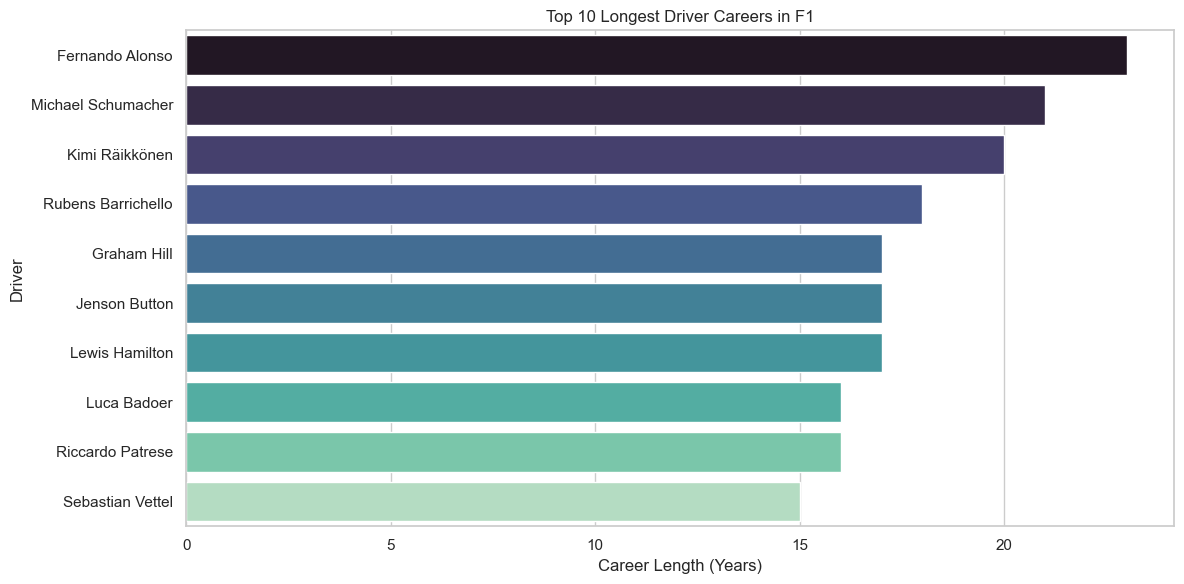

In [258]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=longest_careers.head(10),
    x='career_length',
    y='driver',
    palette='mako'
)
plt.title('Top 10 Longest Driver Careers in F1')
plt.xlabel('Career Length (Years)')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()

In [270]:
# Comeback Drivers 🚀

df['positions_gained'] = df['starting_grid'] - df['final_position']

comebacks_df = df.dropna(subset=['starting_grid', 'final_position'])
comebacks_df['starting_grid'] = comebacks_df['starting_grid'].astype(int)
comebacks_df['final_position'] = comebacks_df['final_position'].astype(int)

# Calculate position change
comebacks_df['positions_gained'] = comebacks_df['starting_grid'] - comebacks_df['final_position']
comebacks_df = comebacks_df[(comebacks_df['final_position'] > 0) & (comebacks_df['year'] >= 2000)]

top_comebacks = comebacks_df.sort_values(by='positions_gained', ascending=False)
top_comebacks['driver'] = top_comebacks['forename'] + ' ' + top_comebacks['surname']

top_comebacks_display = top_comebacks[['year', 'grand_prix', 'driver', 'starting_grid', 'final_position', 'positions_gained']]
top_comebacks_display.head(10)

/var/folders/mt/xrr07_4s60g1zswr8f0cq20r0000gn/T/ipykernel_55788/3565117434.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comebacks_df['starting_grid'] = comebacks_df['starting_grid'].astype(int)
/var/folders/mt/xrr07_4s60g1zswr8f0cq20r0000gn/T/ipykernel_55788/3565117434.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comebacks_df['final_position'] = comebacks_df['final_position'].astype(int)
/var/folders/mt/xrr07_4s60g1zswr8f0cq20r0000gn/T/ipykernel_55788/3565117434.py:10: SettingWithCopyWarning:

,year,grand_prix,driver,starting_grid,final_position,positions_gained
21641,2012,Abu Dhabi Grand Prix,Sebastian Vettel,24,3,21
744,2006,Bahrain Grand Prix,Kimi Räikkönen,22,3,19
22351,2014,Hungarian Grand Prix,Lewis Hamilton,22,3,19
21043,2011,Belgian Grand Prix,Michael Schumacher,24,5,19
20447,2010,Monaco Grand Prix,Fernando Alonso,24,6,18
23180,2016,Belgian Grand Prix,Lewis Hamilton,21,3,18
481,2007,Canadian Grand Prix,Heikki Kovalainen,22,4,18
1355,2005,German Grand Prix,Juan Pablo Montoya,20,2,18
25241,2021,Russian Grand Prix,Max Verstappen,20,2,18
24401,2019,German Grand Prix,Sebastian Vettel,20,2,18


/var/folders/mt/xrr07_4s60g1zswr8f0cq20r0000gn/T/ipykernel_55788/3154165818.py:13: UserWarning: Glyph 127950 (\N{RACING CAR}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/mt/xrr07_4s60g1zswr8f0cq20r0000gn/T/ipykernel_55788/3154165818.py:13: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
/Users/vishwajithsomarampet/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127950 (\N{RACING CAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/vishwajithsomarampet/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


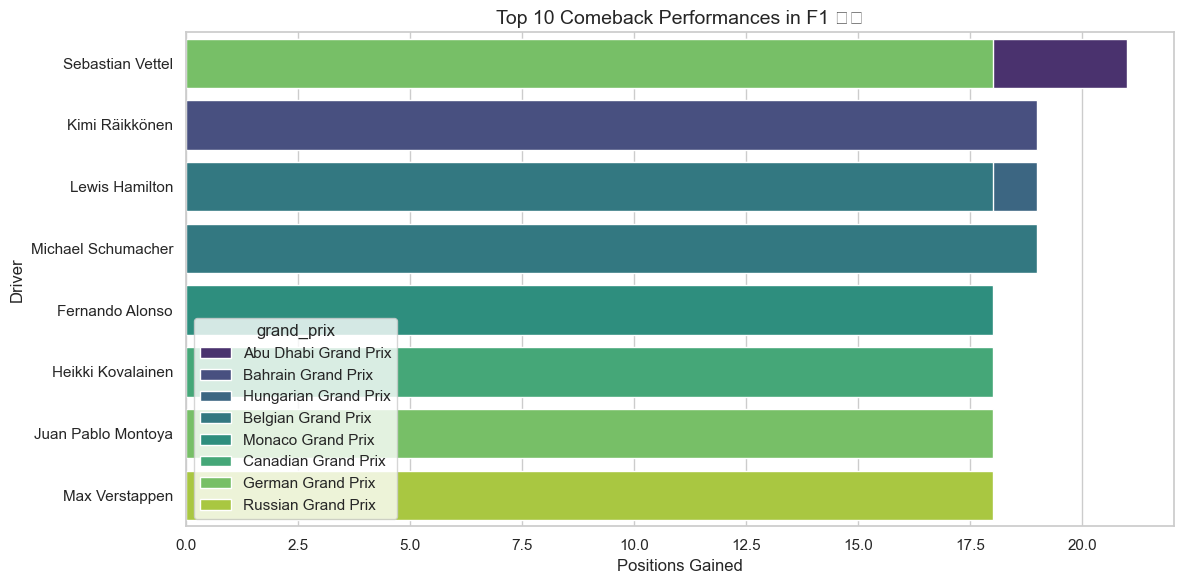

In [271]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_comebacks.head(10),
    x='positions_gained',
    y='driver',
    hue='grand_prix',
    dodge=False,
    palette='viridis'
)
plt.title('Top 10 Comeback Performances in F1 🏎️', fontsize=14)
plt.xlabel('Positions Gained')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()

In [273]:
pit_stops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [274]:
# Pit Stop Strategy Analysis 🛠️⛽

# Count number of pit stops per driver per race
pit_counts = pit_stops.groupby(['raceId', 'driverId']).size().reset_index(name='num_pit_stops')
pit_counts.head()

,raceId,driverId,num_pit_stops
0,841,1,2
1,841,2,2
2,841,3,1
3,841,4,3
4,841,5,1


In [275]:
# Merge pit stop count with race results
pit_strategy = results.merge(pit_counts, on=['raceId', 'driverId'], how='left')

# Fill NaN pit stops with 0 (some drivers may have 0 stops recorded)
pit_strategy['num_pit_stops'] = pit_strategy['num_pit_stops'].fillna(0).astype(int)

In [276]:
pit_strategy = pit_strategy.merge(drivers[['driverId', 'forename', 'surname']], on='driverId', how='left')
pit_strategy = pit_strategy.merge(races[['raceId', 'year', 'name']], on='raceId', how='left')

In [284]:
pit_strategy = pit_strategy.rename(columns={'year_x': 'year', 'name': 'grand_prix'})

In [285]:
pit_stratgy = pit_strategy.drop(columns=['year_y'])

In [287]:
pit_strategy[['year', 'grand_prix', 'forename', 'surname', 'position', 'num_pit_stops']].sample(10)

,year,grand_prix,forename,surname,position,num_pit_stops
11246,1982,Monaco Grand Prix,Raul,Boesel,\N,0
1274,2005,Canadian Grand Prix,Kimi,Räikkönen,1,0
20319,1963,South African Grand Prix,Mike,Hailwood,\N,0
24836,2020,Eifel Grand Prix,Alexander,Albon,\N,1
9638,1986,German Grand Prix,Nigel,Mansell,3,0
5675,1993,San Marino Grand Prix,Derek,Warwick,\N,0
9092,1987,Detroit Grand Prix,Alain,Prost,3,0
18164,1960,Dutch Grand Prix,Lance,Reventlow,\N,0
4858,1995,Canadian Grand Prix,Taki,Inoue,9,0
8674,1988,Detroit Grand Prix,Satoru,Nakajima,\N,0


In [289]:
# 🧠 Does number of pit stops affect race position?

# Convert position to numeric (some are strings like '\N')
pit_strategy['position'] = pd.to_numeric(pit_strategy['position'], errors='coerce')
pit_strategy_clean = pit_strategy.dropna(subset=['position'])

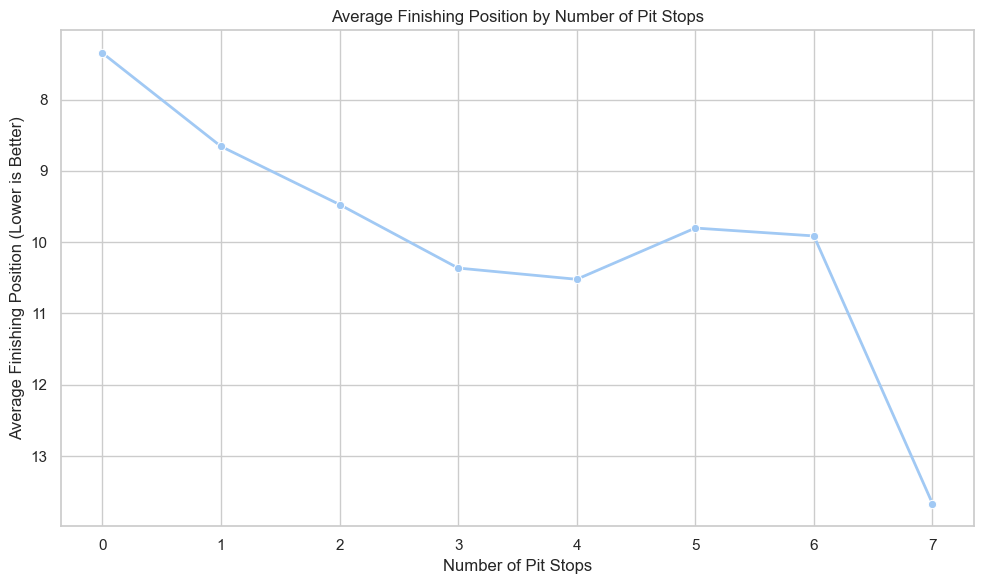

In [290]:
# Group and calculate average position for each number of pit stops
avg_finish_by_pit = pit_strategy_clean.groupby('num_pit_stops')['position'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_finish_by_pit, x='num_pit_stops', y='position', marker='o', linewidth=2)
plt.title('Average Finishing Position by Number of Pit Stops')
plt.xlabel('Number of Pit Stops')
plt.ylabel('Average Finishing Position (Lower is Better)')
plt.gca().invert_yaxis()  # Invert Y-axis: 1st place is better
plt.grid(True)
plt.tight_layout()
plt.show()

In [291]:
# Pit Stop Analysis – Fastest Pit Crews & Strategy Insights

pit_stops_clean = pit_stops.copy()
pit_stops_clean = pit_stops_clean[pit_stops_clean['milliseconds'].notna()]

pit_stops_clean['seconds'] = pit_stops_clean['milliseconds'] / 1000

pit_stops_clean = pit_stops_clean.merge(races[['raceId', 'year', 'name']], on='raceId', how='left')
pit_stops_clean = pit_stops_clean.merge(drivers[['driverId', 'forename', 'surname']], on='driverId', how='left')
pit_stops_clean['race_uid'] = pit_stops_clean['year'].astype(str) + '_' + pit_stops_clean['name']

In [292]:
# fastest pits

fastest_pits = pit_stops_clean.sort_values(by='seconds')
fastest_pits[['year', 'name', 'forename', 'surname', 'stop', 'lap', 'seconds']].head(10)

,year,name,forename,surname,stop,lap,seconds
1037,2011,Abu Dhabi Grand Prix,Pastor,Maldonado,2,30,12.897
1044,2011,Abu Dhabi Grand Prix,Bruno,Senna,3,36,12.959
693,2011,Hungarian Grand Prix,Lewis,Hamilton,6,56,13.173
632,2011,Hungarian Grand Prix,Pastor,Maldonado,2,16,13.186
1640,2012,Hungarian Grand Prix,Michael,Schumacher,2,4,13.199
655,2011,Hungarian Grand Prix,Sergio,Pérez,3,32,13.201
1692,2012,Hungarian Grand Prix,Pastor,Maldonado,3,52,13.206
1399,2012,Spanish Grand Prix,Felipe,Massa,2,28,13.259
2330,2013,Spanish Grand Prix,Pastor,Maldonado,2,13,13.266
1402,2012,Spanish Grand Prix,Sebastian,Vettel,3,30,13.335


In [293]:
pit_full = pit_stops_clean.merge(results[['raceId', 'driverId', 'constructorId']], on=['raceId', 'driverId'], how='left')
pit_full = pit_full.merge(constructors[['constructorId', 'name']].rename(columns={'name': 'constructor_name'}), on='constructorId', how='left')

In [295]:
# Average pit stop time per constructor

avg_pit_by_constructor = pit_full.groupby('constructor_name')['seconds'].mean().reset_index().sort_values(by='seconds')
avg_pit_by_constructor.head(10)

,constructor_name,seconds
21,Virgin,24.236195
9,Lotus,24.444212
10,Lotus F1,32.463751
7,HRT,32.677767
4,Caterham,33.924618
12,Marussia,34.396837
20,Toro Rosso,44.486984
6,Force India,50.845770
19,Sauber,57.248314
18,Renault,63.261834


/var/folders/mt/xrr07_4s60g1zswr8f0cq20r0000gn/T/ipykernel_55788/1484077718.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_pit_by_constructor.head(10), x='seconds', y='constructor_name', palette='magma')


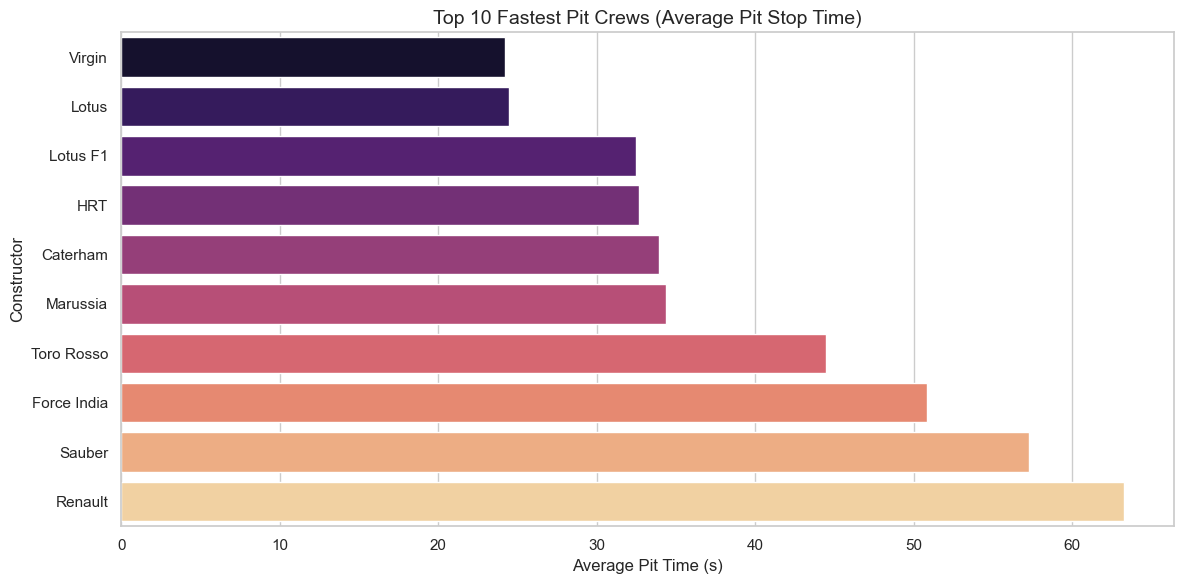

In [296]:
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_pit_by_constructor.head(10), x='seconds', y='constructor_name', palette='magma')
plt.title('Top 10 Fastest Pit Crews (Average Pit Stop Time)', fontsize=14)
plt.xlabel('Average Pit Time (s)')
plt.ylabel('Constructor')
plt.tight_layout()
plt.show()

In [303]:
# Extended Pit Stop Analysis

# Count pit stops per driver per race
stop_counts = pit_stops_clean.groupby(['raceId', 'driverId']).size().reset_index(name='total_pit_stops')

stop_counts = stop_counts.merge(races[['raceId', 'year', 'name']], on='raceId', how='left')
stop_counts = stop_counts.merge(
    drivers[['driverId', 'forename', 'surname']],
    on='driverId',
    how='left'
)
stop_counts = stop_counts.merge(
    results[['raceId', 'driverId', 'constructorId']],
    on=['raceId', 'driverId'],
    how='left'
).merge(
    constructors[['constructorId', 'name']].rename(columns={'name': 'constructor_name'}),
    on='constructorId',
    how='left'
)

stop_counts['driver'] = stop_counts['forename'] + ' ' + stop_counts['surname']
stop_counts.head()

,raceId,driverId,total_pit_stops,year,name,forename,surname,constructorId,constructor_name,driver
0,841,1,2,2011,Australian Grand Prix,Lewis,Hamilton,1,McLaren,Lewis Hamilton
1,841,2,2,2011,Australian Grand Prix,Nick,Heidfeld,4,Renault,Nick Heidfeld
2,841,3,1,2011,Australian Grand Prix,Nico,Rosberg,131,Mercedes,Nico Rosberg
3,841,4,3,2011,Australian Grand Prix,Fernando,Alonso,6,Ferrari,Fernando Alonso
4,841,5,1,2011,Australian Grand Prix,Heikki,Kovalainen,205,Lotus,Heikki Kovalainen


In [304]:
# Classify stop strategies

stop_counts['strategy'] = stop_counts['total_pit_stops'].apply(
    lambda x: f'{x}-stop' if x<=4 else '5+ stops'
)

# Count frequency of strategies by year
strategy_by_team_year = stop_counts.groupby(['year', 'strategy', 'constructor_name', 'driver']).size().reset_index(name='count')
strategy_by_team_year.head(10)

,year,strategy,constructor_name,driver,count
0,2011,1-stop,Ferrari,Felipe Massa,1
1,2011,1-stop,Force India,Paul di Resta,1
2,2011,1-stop,HRT,Daniel Ricciardo,1
3,2011,1-stop,HRT,Narain Karthikeyan,1
4,2011,1-stop,HRT,Vitantonio Liuzzi,4
5,2011,1-stop,Lotus,Heikki Kovalainen,2
6,2011,1-stop,Lotus,Jarno Trulli,2
7,2011,1-stop,McLaren,Jenson Button,1
8,2011,1-stop,McLaren,Lewis Hamilton,1
9,2011,1-stop,Mercedes,Michael Schumacher,2


In [305]:
# Step 5: Get the most common strategy for each constructor-year

most_common_strategy = (
    strategy_by_team_year.sort_values(by='count', ascending=False)
    .groupby(['constructor_name', 'year'])
    .first()
    .reset_index()
)
most_common_strategy.head(10)

,constructor_name,year,strategy,driver,count
0,Alfa Romeo,2019,2-stop,Antonio Giovinazzi,10
1,Alfa Romeo,2020,1-stop,Kimi Räikkönen,7
2,Alfa Romeo,2021,2-stop,Antonio Giovinazzi,10
3,Alfa Romeo,2022,1-stop,Valtteri Bottas,12
4,Alfa Romeo,2023,2-stop,Guanyu Zhou,11
5,AlphaTauri,2020,2-stop,Pierre Gasly,10
6,AlphaTauri,2021,2-stop,Yuki Tsunoda,6
7,AlphaTauri,2022,1-stop,Pierre Gasly,9
8,AlphaTauri,2023,2-stop,Yuki Tsunoda,8
9,Alpine F1 Team,2021,1-stop,Fernando Alonso,10


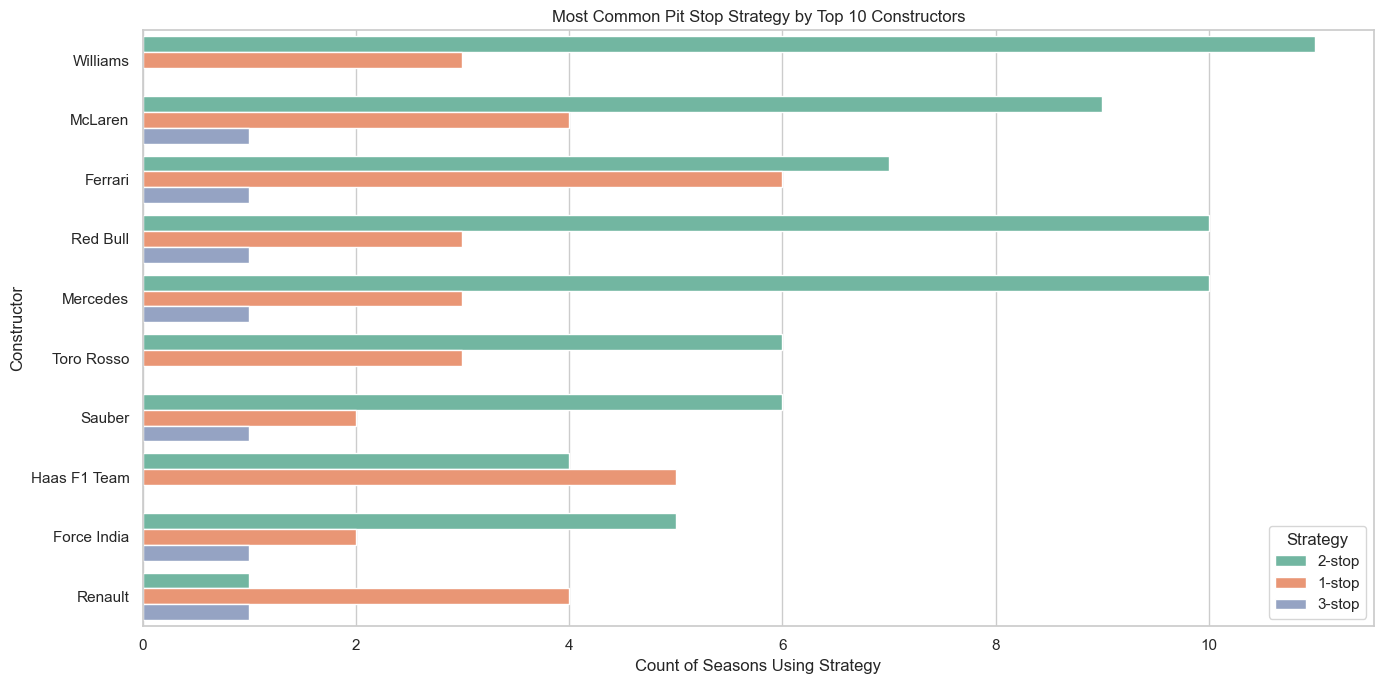

In [306]:
plt.figure(figsize=(14, 7))
sns.countplot(
    data=most_common_strategy,
    y='constructor_name',
    hue='strategy',
    order=most_common_strategy['constructor_name'].value_counts().index[:10],
    palette='Set2'
)
plt.title('Most Common Pit Stop Strategy by Top 10 Constructors')
plt.xlabel('Count of Seasons Using Strategy')
plt.ylabel('Constructor')
plt.legend(title='Strategy')
plt.tight_layout()
plt.show()

In [307]:
# Average Lap of First Pit Stop

first_stop_lap = pit_stops_clean.groupby(['raceId', 'driverId'])['lap'].mean().reset_index(name='first_pit_lap')

# Merge with race year and constructor
first_stop_lap = first_stop_lap.merge(
    results[['raceId', 'driverId', 'constructorId']],
    on=['raceId', 'driverId'],
    how='left'
).merge(
    constructors[['constructorId', 'name']].rename(columns={'name': 'constructor_name'}),
    on='constructorId',
    how='left'
).merge(
    races[['raceId', 'year']],
    on='raceId',
    how='left'
)

# Average first pit lap by constructor
avg_first_pit = first_stop_lap.groupby('constructor_name')['first_pit_lap'].mean().reset_index().sort_values(by='first_pit_lap')
avg_first_pit.head(10)

,constructor_name,first_pit_lap
18,Renault,23.483641
19,Sauber,23.593421
10,Lotus F1,23.817669
15,RB F1 Team,23.966667
22,Williams,24.031707
20,Toro Rosso,24.114357
6,Force India,24.322768
8,Haas F1 Team,24.615527
16,Racing Point,24.742254
0,Alfa Romeo,25.018771


/var/folders/mt/xrr07_4s60g1zswr8f0cq20r0000gn/T/ipykernel_55788/3982371948.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_first_pit.head(10), x='first_pit_lap', y='constructor_name', palette='coolwarm')


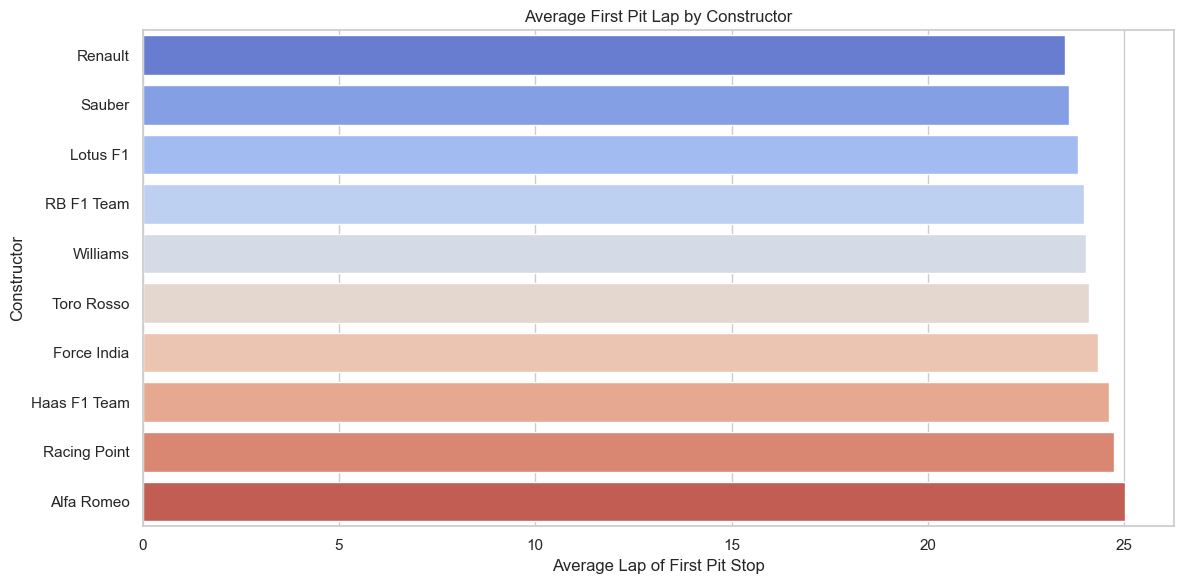

In [308]:
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_first_pit.head(10), x='first_pit_lap', y='constructor_name', palette='coolwarm')
plt.title('Average First Pit Lap by Constructor')
plt.xlabel('Average Lap of First Pit Stop')
plt.ylabel('Constructor')
plt.tight_layout()
plt.show()

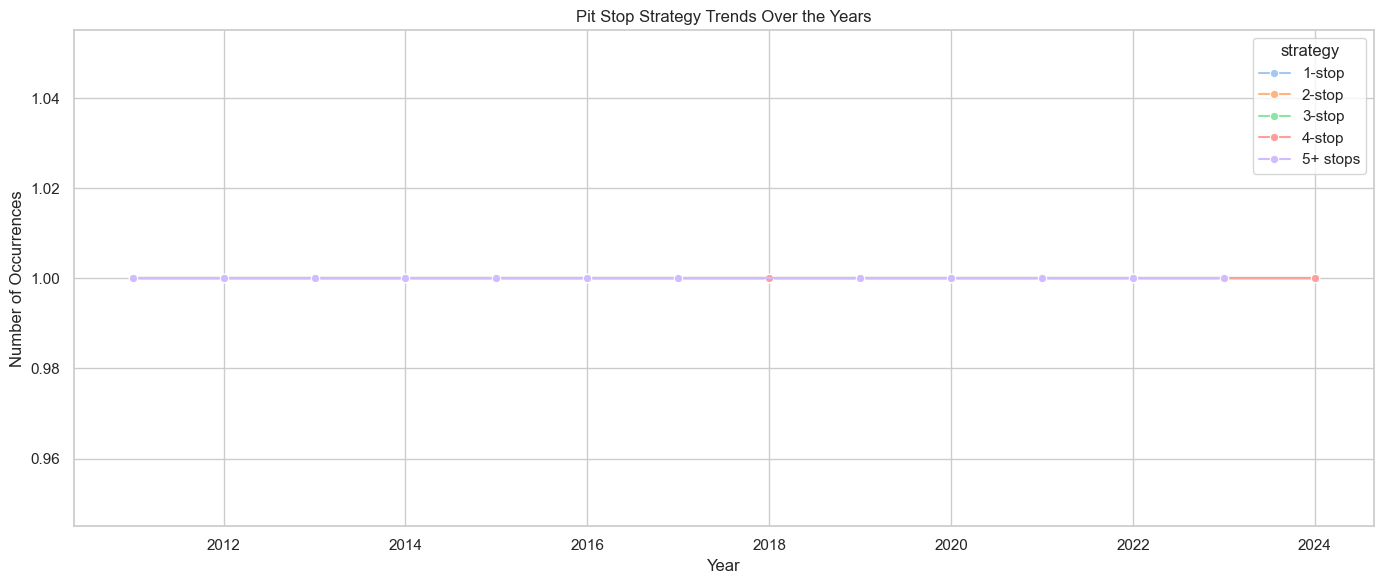

In [309]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=strategy_by_year, x='year', y='count', hue='strategy', marker='o')
plt.title('Pit Stop Strategy Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.tight_layout()
plt.show()

In [310]:
# Build Strategy Dataset for ML

# Step 1: Count pit stops per driver per race
strategy_data = pit_stops_clean.groupby(['raceId', 'driverId']).size().reset_index(name='total_pit_stops')

# Step 2: Merge race, driver, constructor info
strategy_data = strategy_data.merge(
    results[['raceId', 'driverId', 'constructorId', 'grid', 'positionOrder', 'points']],
    on=['raceId', 'driverId'],
    how='left'
).merge(
    races[['raceId', 'year']],
    on='raceId',
    how='left'
).merge(
    drivers[['driverId', 'forename', 'surname']],
    on='driverId',
    how='left'
).merge(
    constructors[['constructorId', 'name']].rename(columns={'name': 'constructor_name'}),
    on='constructorId',
    how='left'
)

# Step 3: Strategy label
strategy_data['strategy'] = strategy_data['total_pit_stops'].apply(
    lambda x: f'{x}-stop' if x <= 4 else '5+ stops'
)

# Step 4: Clean column names
strategy_data.rename(columns={
    'grid': 'starting_grid',
    'positionOrder': 'final_position',
    'points': 'race_points'
}, inplace=True)

# Final Preview
strategy_data[['year', 'forename', 'surname', 'constructor_name', 'starting_grid',
               'final_position', 'race_points', 'total_pit_stops', 'strategy']].head(10)

,year,forename,surname,constructor_name,starting_grid,final_position,race_points,total_pit_stops,strategy
0,2011,Lewis,Hamilton,McLaren,2,2,18.0,2,2-stop
1,2011,Nick,Heidfeld,Renault,18,12,0.0,2,2-stop
2,2011,Nico,Rosberg,Mercedes,7,17,0.0,1,1-stop
3,2011,Fernando,Alonso,Ferrari,5,4,12.0,3,3-stop
4,2011,Heikki,Kovalainen,Lotus,19,18,0.0,1,1-stop
5,2011,Timo,Glock,Virgin,21,15,0.0,1,1-stop
6,2011,Felipe,Massa,Ferrari,8,7,6.0,3,3-stop
7,2011,Jarno,Trulli,Lotus,20,13,0.0,2,2-stop
8,2011,Adrian,Sutil,Force India,16,9,2.0,2,2-stop
9,2011,Mark,Webber,Red Bull,3,5,10.0,3,3-stop


/var/folders/mt/xrr07_4s60g1zswr8f0cq20r0000gn/T/ipykernel_55788/2711366211.py:12: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) Arial.
  plt.tight_layout()
/Users/vishwajithsomarampet/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


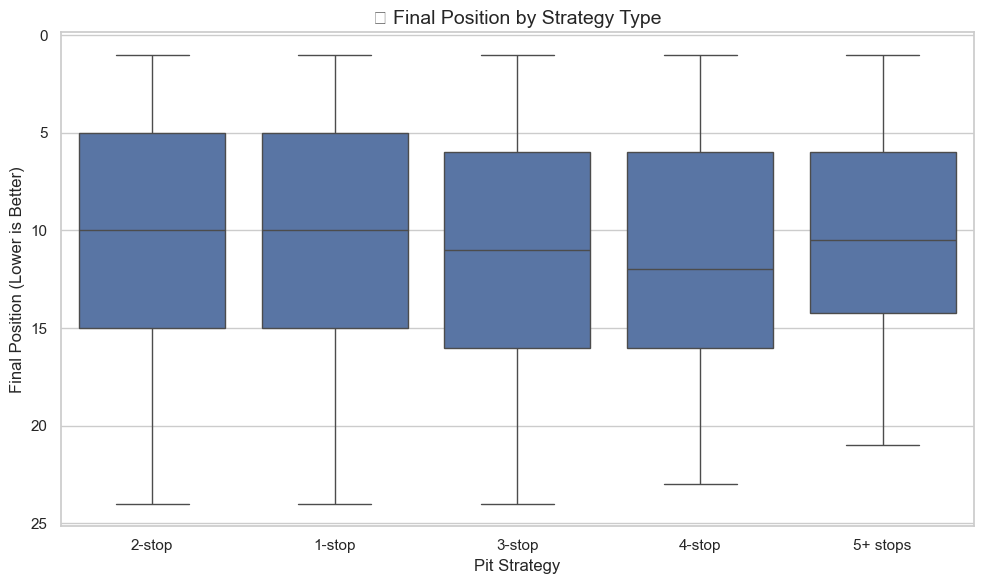

In [312]:
# Optional: Set style
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='strategy', y='final_position', data=strategy_data)

plt.title('🏁 Final Position by Strategy Type', fontsize=14)
plt.xlabel('Pit Strategy')
plt.ylabel('Final Position (Lower is Better)')
plt.gca().invert_yaxis()  # So 1st place is at the top

plt.tight_layout()
plt.show()

In [320]:
strategy_data.head()

,raceId,driverId,total_pit_stops,constructorId,starting_grid,final_position,race_points,year,forename,surname,constructor_name,strategy
0,841,1,2,1,2,2,18.0,2011,Lewis,Hamilton,McLaren,2-stop
1,841,2,2,4,18,12,0.0,2011,Nick,Heidfeld,Renault,2-stop
2,841,3,1,131,7,17,0.0,2011,Nico,Rosberg,Mercedes,1-stop
3,841,4,3,6,5,4,12.0,2011,Fernando,Alonso,Ferrari,3-stop
4,841,5,1,205,19,18,0.0,2011,Heikki,Kovalainen,Lotus,1-stop


In [2]:
# Tyre Management Insights

from fastf1 import get_session

/Users/vishwajithsomarampet/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
from fastf1 import plotting
import fastf1

In [4]:
# Enable cache so we don't redownload data
fastf1.Cache.enable_cache('/Users/vishwajithsomarampet/Library/Caches/fastf1')
race = fastf1.get_session(2023, 'Monza', 'R')
race.load()

core           INFO 	Loading data for Italian Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 06:25.888000 before the recorded end of the session.
core        WARNING 	Driver 11 completed the race distance 06:19.824000 before the recorded end of the session.
core        WAR

In [5]:
# Load stints data
from fastf1 import utils

stint_cols = ['Driver', 'Stint', 'Compound', 'LapNumber', 'LapTime']
stints_data = race.laps.loc[:, stint_cols]
stints_data.head()

,Driver,Stint,Compound,LapNumber,LapTime
0,VER,1.0,MEDIUM,1.0,0 days 00:01:27.905000
1,VER,1.0,MEDIUM,2.0,0 days 00:01:26.163000
2,VER,1.0,MEDIUM,3.0,0 days 00:01:25.702000
3,VER,1.0,MEDIUM,4.0,0 days 00:01:26.050000
4,VER,1.0,MEDIUM,5.0,0 days 00:01:26.176000


In [6]:
laps_data = race.laps

In [7]:
laps_data.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:23:49.780000,VER,1,0 days 00:01:27.905000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:29.666000,...,True,Red Bull Racing,0 days 01:22:21.726000,2023-09-03 13:23:22.771,1,2.0,False,,False,False
1,0 days 01:25:15.943000,VER,1,0 days 00:01:26.163000,2.0,1.0,NaT,NaT,0 days 00:00:28.274000,0 days 00:00:29.543000,...,True,Red Bull Racing,0 days 01:23:49.780000,2023-09-03 13:24:50.825,1,2.0,False,,False,True
2,0 days 01:26:41.645000,VER,1,0 days 00:01:25.702000,3.0,1.0,NaT,NaT,0 days 00:00:28.097000,0 days 00:00:29.320000,...,True,Red Bull Racing,0 days 01:25:15.943000,2023-09-03 13:26:16.988,1,2.0,False,,False,True
3,0 days 01:28:07.695000,VER,1,0 days 00:01:26.050000,4.0,1.0,NaT,NaT,0 days 00:00:28.145000,0 days 00:00:29.474000,...,True,Red Bull Racing,0 days 01:26:41.645000,2023-09-03 13:27:42.690,1,2.0,False,,False,True
4,0 days 01:29:33.871000,VER,1,0 days 00:01:26.176000,5.0,1.0,NaT,NaT,0 days 00:00:28.155000,0 days 00:00:29.514000,...,True,Red Bull Racing,0 days 01:28:07.695000,2023-09-03 13:29:08.740,1,2.0,False,,False,True


In [8]:
# Summarize Stints Per Driver

stints_summary = (
    stints_data.groupby(['Driver', 'Stint', 'Compound'])
    .agg(
        stint_start = ('LapNumber', 'min'),
        stint_end = ('LapNumber', 'max'),
        num_laps = ('LapNumber', 'count'),
        avg_lap_time = ('LapTime', 'mean')
    ).reset_index()
)

stints_summary.head(10)

,Driver,Stint,Compound,stint_start,stint_end,num_laps,avg_lap_time
0,ALB,1.0,MEDIUM,1.0,15.0,15,0 days 00:01:27.657133333
1,ALB,2.0,HARD,16.0,51.0,36,0 days 00:01:27.538666666
2,ALO,1.0,MEDIUM,1.0,21.0,21,0 days 00:01:27.852380952
3,ALO,2.0,HARD,22.0,51.0,30,0 days 00:01:27.417900
4,BOT,1.0,HARD,1.0,25.0,25,0 days 00:01:28.295840
5,BOT,2.0,MEDIUM,26.0,51.0,26,0 days 00:01:27.629160
6,GAS,1.0,MEDIUM,1.0,10.0,10,0 days 00:01:28.892600
7,GAS,2.0,HARD,11.0,31.0,21,0 days 00:01:28.632142857
8,GAS,3.0,MEDIUM,32.0,51.0,20,0 days 00:01:27.612368421
9,HAM,1.0,HARD,1.0,27.0,27,0 days 00:01:27.679481481


In [9]:
# Step 2.1: Extract Pit Stop Laps for Each Driver
pit_stops = (
    stints_data
    .sort_values(['Driver', 'LapNumber'])
    .groupby('Driver')
    .apply(lambda df: df[df['Stint'].diff() == 1])
    .reset_index(drop=True)
)
pit_stops[['Driver', 'Compound', 'Stint']].head(10)

/var/folders/mt/xrr07_4s60g1zswr8f0cq20r0000gn/T/ipykernel_1777/3690318794.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stints_data


,Driver,Compound,Stint
0,ALB,HARD,2.0
1,ALO,HARD,2.0
2,BOT,MEDIUM,2.0
3,GAS,HARD,2.0
4,GAS,MEDIUM,3.0
5,HAM,MEDIUM,2.0
6,HUL,HARD,2.0
7,HUL,MEDIUM,3.0
8,LAW,HARD,2.0
9,LAW,MEDIUM,3.0


In [10]:
# Step 2.2: Number of Pit Stops per Driver (in the Race)

num_pitstops = pit_stops.groupby('Driver').size().reset_index(name='NumPitStops')
num_pitstops.head(10)

,Driver,NumPitStops
0,ALB,1
1,ALO,1
2,BOT,1
3,GAS,2
4,HAM,1
5,HUL,2
6,LAW,2
7,LEC,1
8,MAG,2
9,NOR,1


In [14]:
# Total Pit Stops per Constructor

driver_team = race.results[['Abbreviation', 'TeamName']]
pitstop_team = pit_stops.merge(driver_team, left_on='Driver', right_on='Abbreviation', how='left')
avg_pitstops_per_team = pitstop_team.groupby('TeamName')['Driver'].count().reset_index(name='TotalPitStops')
avg_pitstops_per_team.head(10)

,TeamName,TotalPitStops
0,Alfa Romeo,3
1,AlphaTauri,2
2,Alpine,3
3,Aston Martin,2
4,Ferrari,2
5,Haas F1 Team,4
6,McLaren,3
7,Mercedes,2
8,Red Bull Racing,2
9,Williams,2


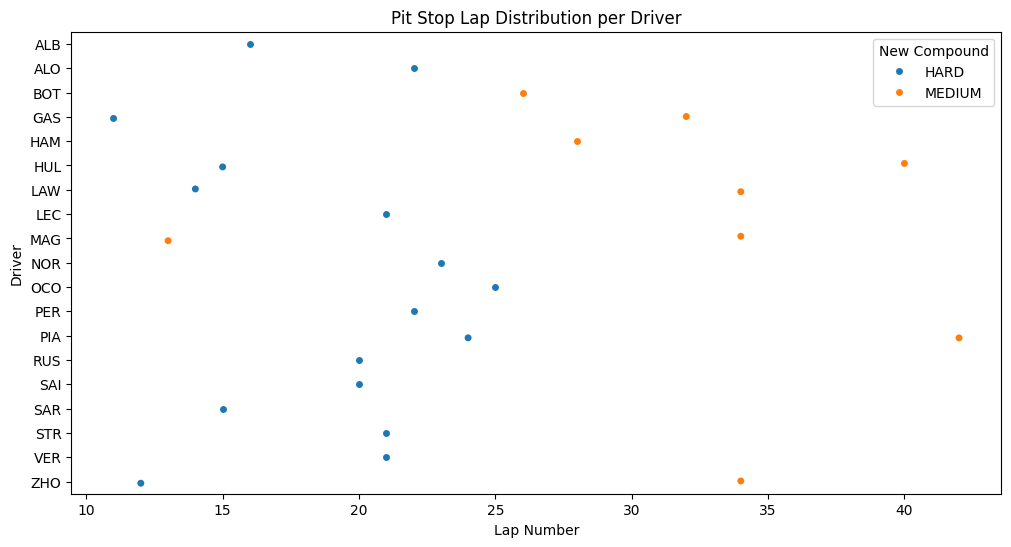

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,6))
sns.stripplot(
    data=pit_stops,
    x='LapNumber',
    y='Driver',
    hue='Compound',
    dodge=False,
    ax=ax
)
plt.title('Pit Stop Lap Distribution per Driver')
plt.xlabel('Lap Number')
plt.ylabel('Driver')
plt.legend(title='New Compound')
plt.show()

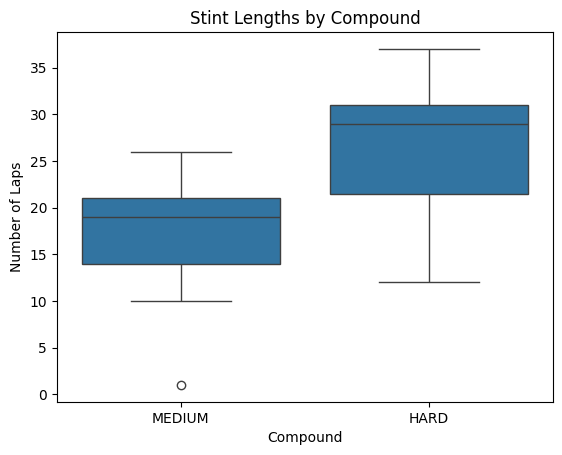

In [17]:
# Stint Length Distribution

sns.boxplot(data=stints_summary, x='Compound', y='num_laps')
plt.title('Stint Lengths by Compound')
plt.xlabel('Compound')
plt.ylabel('Number of Laps')
plt.show()

In [19]:
# Quantify Strategic Patterns and Performance

# Pit Stop Window Analysis

pit_window = (
    pit_stops.groupby('Driver')['LapNumber']
    .agg(['min', 'median', 'max'])
    .reset_index()
    .rename(columns={'min': 'FirstPitLap', 'median': 'MidPitLap', 'max': 'LastPitLap'})
)    

In [22]:
# Tire Compound Usage Across Stints
# Objective: Understand how teams split their stints on different compounds.
#	•	Summarize compounds per stint:

compounds_per_driver = (
    stints_summary.groupby('Driver')['Compound']
    .apply(lambda comps: ', '.join(comps.unique()))
    .reset_index()
    .rename(columns={'Compound': 'CompoundsUsed'})
)
compounds_per_driver.head(10)

,Driver,CompoundsUsed
0,ALB,"MEDIUM, HARD"
1,ALO,"MEDIUM, HARD"
2,BOT,"HARD, MEDIUM"
3,GAS,"MEDIUM, HARD"
4,HAM,"HARD, MEDIUM"
5,HUL,"MEDIUM, HARD"
6,LAW,"MEDIUM, HARD"
7,LEC,"MEDIUM, HARD"
8,MAG,"HARD, MEDIUM"
9,NOR,"MEDIUM, HARD"


In [26]:
# Position Impact Around Pit Stops
# Objective: Quantify if a pit stop led to position gain or loss.
#	•	Compare position before and after a pit stop:

# Use laps DataFrame: must include 'Driver', 'LapNumber', 'Position'
positions = laps_data[['Driver', 'LapNumber', 'Position']]

# Join pit stops with current position
pit_positions = pit_stops[['Driver', 'LapNumber']].merge(
    positions, on=['Driver', 'LapNumber'], how='left'
)

# Add prior lap info to get pre-pit position
pit_positions['PrePitLap'] = pit_positions['LapNumber'] - 1

# Merge to get the position in the lap before the pit stop
pit_positions = pit_positions.merge(
    positions.rename(columns={'LapNumber': 'PrePitLap', 'Position': 'PrePitPosition'}),
    on=['Driver', 'PrePitLap'], how='left'
)

# Calculate position change (negative = positions lost, positive = gained)
pit_positions['PositionChange'] = pit_positions['PrePitPosition'] - pit_positions['Position']

pit_positions.head(10)

,Driver,LapNumber,Position,PrePitLap,PrePitPosition,PositionChange
0,ALB,16.0,13.0,15.0,9.0,-4.0
1,ALO,22.0,12.0,21.0,6.0,-6.0
2,BOT,26.0,16.0,25.0,9.0,-7.0
3,GAS,11.0,19.0,10.0,18.0,-1.0
4,GAS,32.0,19.0,31.0,17.0,-2.0
5,HAM,28.0,10.0,27.0,5.0,-5.0
6,HUL,15.0,17.0,14.0,13.0,-4.0
7,HUL,40.0,17.0,39.0,14.0,-3.0
8,LAW,14.0,16.0,13.0,15.0,-1.0
9,LAW,34.0,16.0,33.0,12.0,-4.0


In [41]:
# Lap Time Impact of Pit Stops
# Goal:
# Analyze how each pit stop affected a driver’s lap times—did they speed up on fresh tires, or experience minimal change? This reveals the immediate performance impact of pitting and different tire strategies.

In [54]:
pit_stops_with_stint['LapTime'] = pd.to_timedelta(pit_stops_with_stint['LapTime'])

In [55]:
# Assign the current stint number by merging pit stop lap with stint's start lap
pit_stops_with_stint = pit_stops.merge(
    stints_summary[['Driver', 'stint_start']],
    left_on=['Driver', 'LapNumber'],
    right_on=['Driver', 'stint_start'],
    how='left'
).rename(columns={'Stint': 'CurrentStint'})
pit_stops_with_stint.head()

,Driver,CurrentStint,Compound,LapNumber,LapTime,stint_start
0,ALB,2.0,HARD,16.0,0 days 00:01:47.605000,16.0
1,ALO,2.0,HARD,22.0,0 days 00:01:47.272000,22.0
2,BOT,2.0,MEDIUM,26.0,0 days 00:01:46.575000,26.0
3,GAS,2.0,HARD,11.0,0 days 00:01:50.170000,11.0
4,GAS,3.0,MEDIUM,32.0,0 days 00:01:46.720000,32.0


In [56]:
pit_stops_with_stint['PrevStint'] = pit_stops_with_stint['CurrentStint'] - 1


In [57]:
import pandas as pd

prev_stint_avg = stints_summary[['Driver', 'Stint', 'avg_lap_time']].rename(
    columns={'Stint': 'PrevStint', 'avg_lap_time': 'PrevAvgLapTime'}
)
pit_stops_with_stint = pd.merge(
    pit_stops_with_stint,
    prev_stint_avg,
    on=['Driver', 'PrevStint'],
    how='left'
)
pit_stops_with_stint.head()

,Driver,CurrentStint,Compound,LapNumber,LapTime,stint_start,PrevStint,PrevAvgLapTime
0,ALB,2.0,HARD,16.0,0 days 00:01:47.605000,16.0,1.0,0 days 00:01:27.657133333
1,ALO,2.0,HARD,22.0,0 days 00:01:47.272000,22.0,1.0,0 days 00:01:27.852380952
2,BOT,2.0,MEDIUM,26.0,0 days 00:01:46.575000,26.0,1.0,0 days 00:01:28.295840
3,GAS,2.0,HARD,11.0,0 days 00:01:50.170000,11.0,1.0,0 days 00:01:28.892600
4,GAS,3.0,MEDIUM,32.0,0 days 00:01:46.720000,32.0,2.0,0 days 00:01:28.632142857


In [58]:
curr_stint_avg = stints_summary[['Driver', 'Stint', 'avg_lap_time', 'Compound']].rename(
    columns={'Stint': 'CurrentStint', 'avg_lap_time': 'CurrAvgLapTime', 'Compound': 'CurrCompound'}
)
pit_stops_with_stint = pd.merge(
    pit_stops_with_stint,
    curr_stint_avg,
    on=['Driver', 'CurrentStint'],
    how='left'
)
pit_stops_with_stint.head()

,Driver,CurrentStint,Compound,LapNumber,LapTime,stint_start,PrevStint,PrevAvgLapTime,CurrAvgLapTime,CurrCompound
0,ALB,2.0,HARD,16.0,0 days 00:01:47.605000,16.0,1.0,0 days 00:01:27.657133333,0 days 00:01:27.538666666,HARD
1,ALO,2.0,HARD,22.0,0 days 00:01:47.272000,22.0,1.0,0 days 00:01:27.852380952,0 days 00:01:27.417900,HARD
2,BOT,2.0,MEDIUM,26.0,0 days 00:01:46.575000,26.0,1.0,0 days 00:01:28.295840,0 days 00:01:27.629160,MEDIUM
3,GAS,2.0,HARD,11.0,0 days 00:01:50.170000,11.0,1.0,0 days 00:01:28.892600,0 days 00:01:28.632142857,HARD
4,GAS,3.0,MEDIUM,32.0,0 days 00:01:46.720000,32.0,2.0,0 days 00:01:28.632142857,0 days 00:01:27.612368421,MEDIUM


In [60]:
# If lap times are timedelta, this gives change in seconds
pit_stops_with_stint['AvgLimeTimeChange'] = (
    pit_stops_with_stint['PrevAvgLapTime'] - pit_stops_with_stint['CurrAvgLapTime']
).dt.total_seconds()

In [66]:
pit_stops_with_stint = pit_stops_with_stint.rename(columns={'AvgLimeTimeChange' : 'AvgLapTimeChange'})
pit_stops_with_stint.head(10)

,Driver,CurrentStint,Compound,LapNumber,LapTime,stint_start,PrevStint,PrevAvgLapTime,CurrAvgLapTime,CurrCompound,AvgLapTimeChange
0,ALB,2.0,HARD,16.0,0 days 00:01:47.605000,16.0,1.0,0 days 00:01:27.657133333,0 days 00:01:27.538666666,HARD,0.118467
1,ALO,2.0,HARD,22.0,0 days 00:01:47.272000,22.0,1.0,0 days 00:01:27.852380952,0 days 00:01:27.417900,HARD,0.434481
2,BOT,2.0,MEDIUM,26.0,0 days 00:01:46.575000,26.0,1.0,0 days 00:01:28.295840,0 days 00:01:27.629160,MEDIUM,0.666680
3,GAS,2.0,HARD,11.0,0 days 00:01:50.170000,11.0,1.0,0 days 00:01:28.892600,0 days 00:01:28.632142857,HARD,0.260457
4,GAS,3.0,MEDIUM,32.0,0 days 00:01:46.720000,32.0,2.0,0 days 00:01:28.632142857,0 days 00:01:27.612368421,MEDIUM,1.019774
5,HAM,2.0,MEDIUM,28.0,0 days 00:01:45.978000,28.0,1.0,0 days 00:01:27.679481481,0 days 00:01:27.144833333,MEDIUM,0.534648
6,HUL,2.0,HARD,15.0,0 days 00:01:49.615000,15.0,1.0,0 days 00:01:28.413214285,0 days 00:01:28.641520,HARD,-0.228306
7,HUL,3.0,MEDIUM,40.0,0 days 00:01:46.370000,40.0,2.0,0 days 00:01:28.641520,0 days 00:01:28.128454545,MEDIUM,0.513065
8,LAW,2.0,HARD,14.0,0 days 00:01:47.344000,14.0,1.0,0 days 00:01:28.337000,0 days 00:01:28.461000,HARD,-0.124000
9,LAW,3.0,MEDIUM,34.0,0 days 00:01:46.710000,34.0,2.0,0 days 00:01:28.461000,0 days 00:01:27.489882352,MEDIUM,0.971118


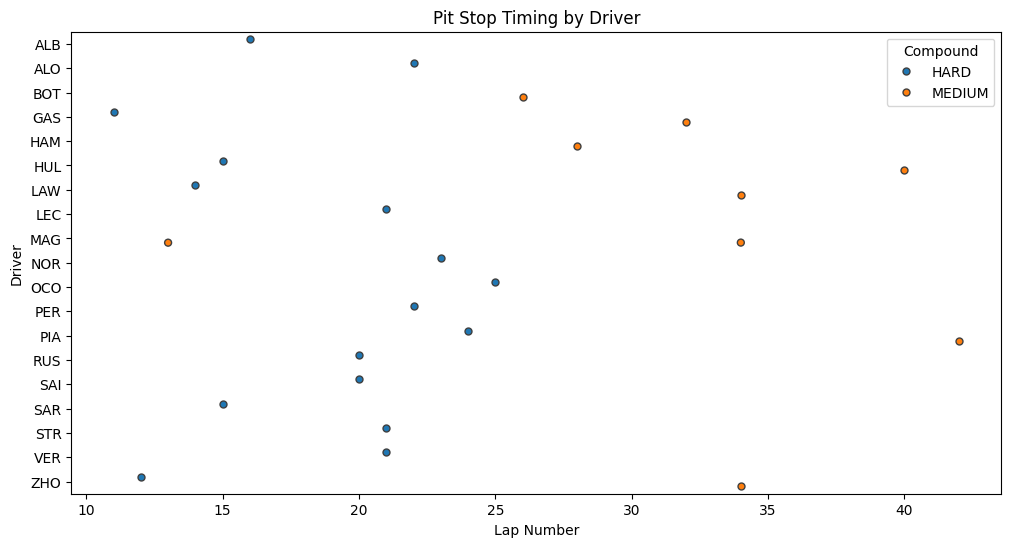

In [62]:
# Step 5.5: Visualization of Strategic Patterns
# Goal: Make your analyses visually intuitive. Turn the statistics you’ve calculated into insightful, publication-ready graphs.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.stripplot(
    data=pit_stops,
    x='LapNumber',
    y='Driver',
    hue='Compound',       # If you want to show tire type after each stop
    dodge=True,
    linewidth=1
)
plt.title('Pit Stop Timing by Driver')
plt.xlabel('Lap Number')
plt.ylabel('Driver')
plt.legend(title="Compound")
plt.show()

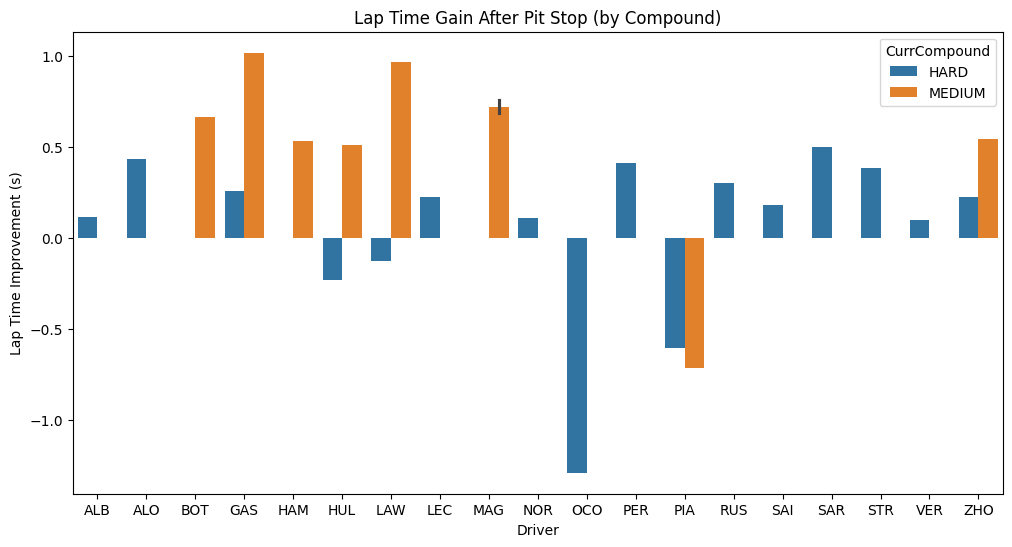

In [68]:
# Lap Time Change Barplot

plt.figure(figsize=(12,6))
sns.barplot(
    data=pit_stops_with_stint,
    x='Driver',
    y='AvgLapTimeChange',
    hue='CurrCompound'
)
plt.ylabel('Lap Time Improvement (s)')
plt.title('Lap Time Gain After Pit Stop (by Compound)')
plt.show()

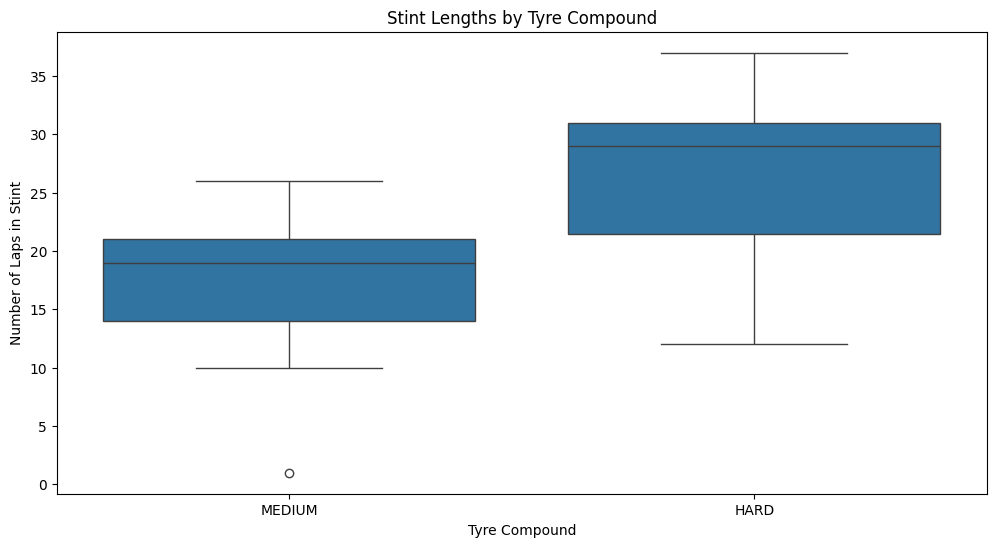

In [69]:
# Stint Length Distribution

plt.figure(figsize=(12,6))
sns.boxplot(
    x='Compound',
    y='num_laps',
    data=stints_summary
)
plt.title('Stint Lengths by Tyre Compound')
plt.xlabel("Tyre Compound")
plt.ylabel("Number of Laps in Stint")
plt.show()

In [71]:
stints_summary.head()

,Driver,Stint,Compound,stint_start,stint_end,num_laps,avg_lap_time
0,ALB,1.0,MEDIUM,1.0,15.0,15,0 days 00:01:27.657133333
1,ALB,2.0,HARD,16.0,51.0,36,0 days 00:01:27.538666666
2,ALO,1.0,MEDIUM,1.0,21.0,21,0 days 00:01:27.852380952
3,ALO,2.0,HARD,22.0,51.0,30,0 days 00:01:27.417900
4,BOT,1.0,HARD,1.0,25.0,25,0 days 00:01:28.295840


In [70]:
# Engineer Features for ML
# Goal: Create a clean, per-driver, per-race summary table suitable for machine learning.

In [72]:
driver_results = race.results[['Abbreviation', 'TeamName', 'GridPosition', 'Position']]

ml_features = (
    num_pitstops
    .merge(stints_summary.groupby('Driver')['num_laps'].mean().reset_index(name='AvgStinitLen'), on='Driver')
    .merge(pit_window[['Driver', 'FirstPitLap', 'LastPitLap']], on='Driver')
    .merge(compounds_per_driver, on='Driver')
    .merge(driver_results, left_on='Driver', right_on='Abbreviation')
    .merge(pit_stops_with_stint[['Driver', 'AvgLapTimeChange']], on='Driver')
)

In [73]:
ml_features.head(10)

,Driver,NumPitStops,AvgStinitLen,FirstPitLap,LastPitLap,CompoundsUsed,Abbreviation,TeamName,GridPosition,Position,AvgLapTimeChange
0,ALB,1,25.5,16.0,16.0,"MEDIUM, HARD",ALB,Williams,6.0,7.0,0.118467
1,ALO,1,25.5,22.0,22.0,"MEDIUM, HARD",ALO,Aston Martin,10.0,9.0,0.434481
2,BOT,1,25.5,26.0,26.0,"HARD, MEDIUM",BOT,Alfa Romeo,14.0,10.0,0.666680
3,GAS,2,17.0,11.0,32.0,"MEDIUM, HARD",GAS,Alpine,17.0,15.0,0.260457
4,GAS,2,17.0,11.0,32.0,"MEDIUM, HARD",GAS,Alpine,17.0,15.0,1.019774
5,HAM,1,25.5,28.0,28.0,"HARD, MEDIUM",HAM,Mercedes,8.0,6.0,0.534648
6,HUL,2,17.0,15.0,40.0,"MEDIUM, HARD",HUL,Haas F1 Team,13.0,17.0,-0.228306
7,HUL,2,17.0,15.0,40.0,"MEDIUM, HARD",HUL,Haas F1 Team,13.0,17.0,0.513065
8,LAW,2,17.0,14.0,34.0,"MEDIUM, HARD",LAW,AlphaTauri,12.0,11.0,-0.124000
9,LAW,2,17.0,14.0,34.0,"MEDIUM, HARD",LAW,AlphaTauri,12.0,11.0,0.971118


In [75]:
ml_features.to_csv('../data/features/ml_features', index=False)